In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
from pandas_profiling import ProfileReport
import seaborn
import pycountry_convert as pc
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from statsmodels.regression.linear_model import OLS
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
from statsmodels.api import add_constant
import itertools
from IPython.display import Image
from skopt import BayesSearchCV
from catboost import CatBoostRegressor
import lightgbm as lgb

## Question 1, 2 and 6 

In [5]:
dataset_folders = ['Bike-Sharing-Dataset/', 'Suicide_Rates/','online_video_dataset/']

### Bike Sharing Dataset

In [6]:
bike = pd.read_csv(dataset_folders[0]+"day.csv")
bike = bike.drop(['instant'],axis=1)
print(bike)
bike_prof = ProfileReport(bike, title="Profile Report for Bike Sharing Dataset")
bike_prof.to_widgets()
bike_prof.to_file('bike_prof.html')

         dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0    2011-01-01       1   0     1        0        6           0           2   
1    2011-01-02       1   0     1        0        0           0           2   
2    2011-01-03       1   0     1        0        1           1           1   
3    2011-01-04       1   0     1        0        2           1           1   
4    2011-01-05       1   0     1        0        3           1           1   
..          ...     ...  ..   ...      ...      ...         ...         ...   
726  2012-12-27       1   1    12        0        4           1           2   
727  2012-12-28       1   1    12        0        5           1           2   
728  2012-12-29       1   1    12        0        6           0           2   
729  2012-12-30       1   1    12        0        0           0           1   
730  2012-12-31       1   1    12        0        1           1           2   

         temp     atemp       hum  windspeed  casua

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Suicide Rates Dataset

In [7]:
cols_to_use = ['country','year','sex','age','population',' gdp_for_year ($) ','gdp_per_capita ($)','generation',
                                                               'suicides_no','suicides/100k pop']
suicide = pd.read_csv(dataset_folders[1]+"master.csv",thousands=',',usecols=cols_to_use)[cols_to_use]
print(suicide)
suicide_prof = ProfileReport(suicide, title="Profile Report for Suicide Rates Dataset")
suicide_prof.to_widgets()
suicide_prof.to_file('suicide_prof.html')

          country  year     sex          age  population   gdp_for_year ($)   \
0         Albania  1987    male  15-24 years      312900          2156624900   
1         Albania  1987    male  35-54 years      308000          2156624900   
2         Albania  1987  female  15-24 years      289700          2156624900   
3         Albania  1987    male    75+ years       21800          2156624900   
4         Albania  1987    male  25-34 years      274300          2156624900   
...           ...   ...     ...          ...         ...                 ...   
27815  Uzbekistan  2014  female  35-54 years     3620833         63067077179   
27816  Uzbekistan  2014  female    75+ years      348465         63067077179   
27817  Uzbekistan  2014    male   5-14 years     2762158         63067077179   
27818  Uzbekistan  2014  female   5-14 years     2631600         63067077179   
27819  Uzbekistan  2014  female  55-74 years     1438935         63067077179   

       gdp_per_capita ($)       generat

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Video Transcoding Dataset

In [8]:
transcode_meas = pd.read_csv(dataset_folders[2]+"transcoding_mesurment.tsv", sep='\t')
transcode_meas = transcode_meas.drop(['id'], axis = 1)
print(transcode_meas)
transcode_meas_prof = ProfileReport(transcode_meas, title="Profile Report for Video Transcoding Dataset")
transcode_meas_prof.to_widgets()
transcode_meas_prof.to_file('transcode_meas_prof.html')

        duration  codec  width  height  bitrate  framerate    i      p  b  \
0      130.35667  mpeg4    176     144    54590  12.000000   27   1537  0   
1      130.35667  mpeg4    176     144    54590  12.000000   27   1537  0   
2      130.35667  mpeg4    176     144    54590  12.000000   27   1537  0   
3      130.35667  mpeg4    176     144    54590  12.000000   27   1537  0   
4      130.35667  mpeg4    176     144    54590  12.000000   27   1537  0   
...          ...    ...    ...     ...      ...        ...  ...    ... ..   
68779  972.27100   h264    480     360   278822  29.000000  560  28580  0   
68780  129.88100    vp8    640     480   639331  30.162790   36   3855  0   
68781  249.68000    vp8    320     240   359345  25.068274  129   6113  0   
68782  183.62334   h264   1280     720  2847539  29.000000   98   5405  0   
68783  294.61334  mpeg4    176     144    55242  12.000000   61   3474  0   

       frames   i_size    p_size  b_size      size o_codec  o_bitrate  \
0 

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

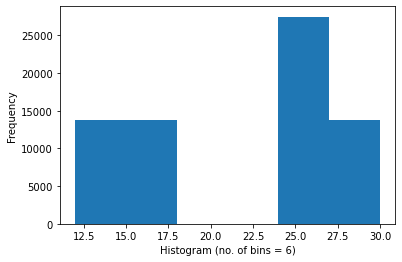

In [10]:
import matplotlib.pyplot as plt
x = [15.0, 12.0, 29.97,25.0,24.0]
y = [13772, 13764, 13759, 13751, 13738]
plt.hist(x,6, weights=y)
plt.xlabel("Histogram (no. of bins = 6)")
plt.ylabel("Frequency")
plt.savefig("Q2c_o_framerate",dpi=300,bbox_inches='tight')
plt.show()

## Question 3

### Bike Sharing Dataset

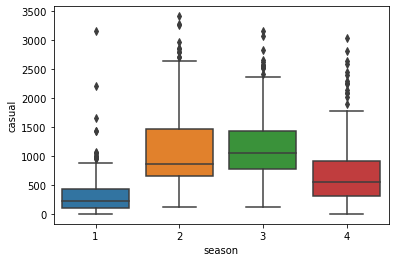

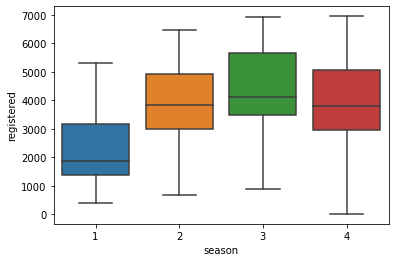

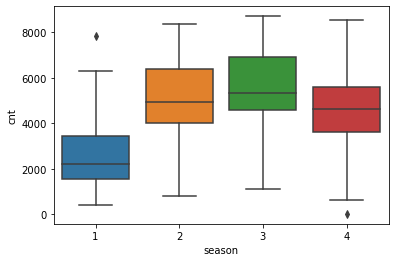

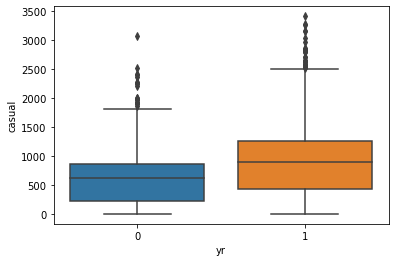

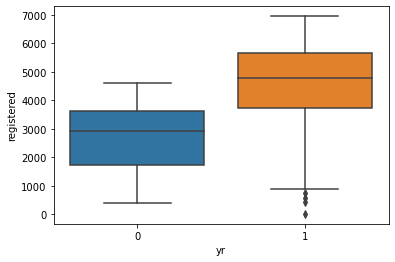

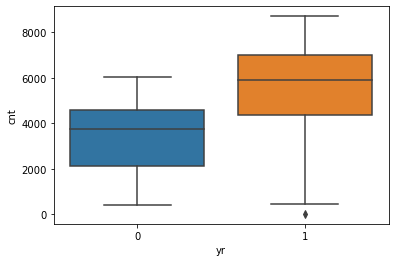

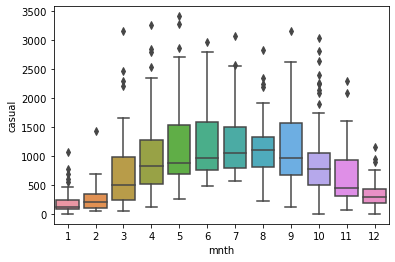

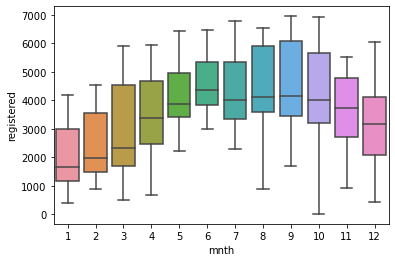

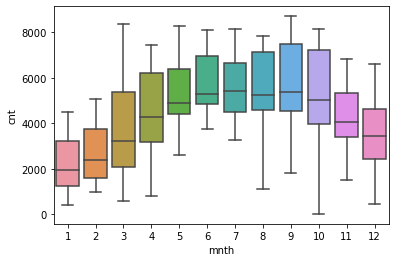

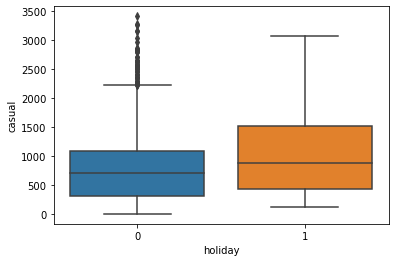

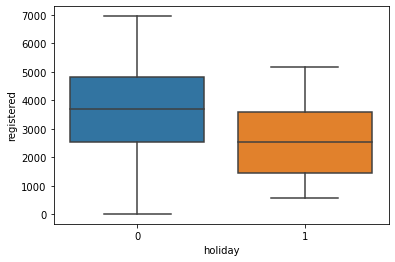

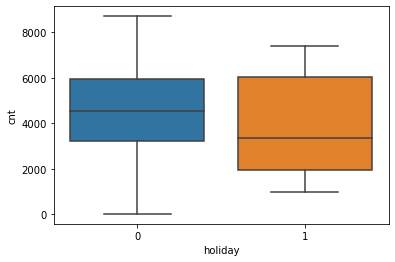

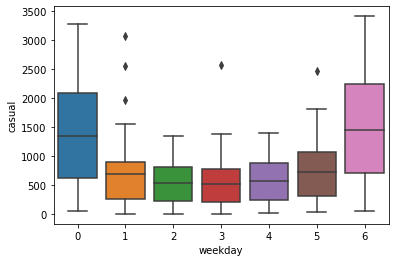

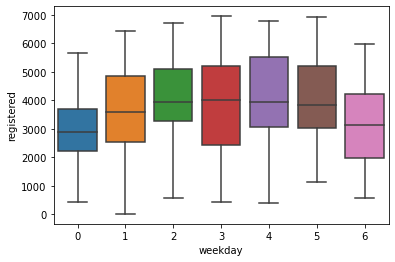

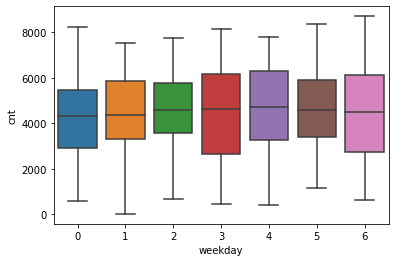

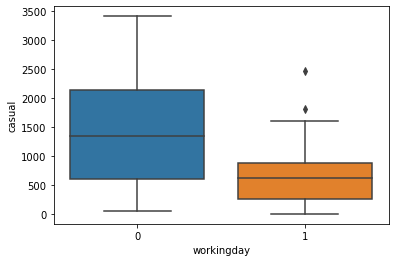

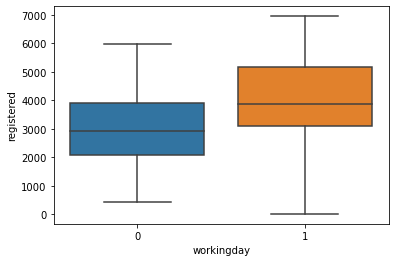

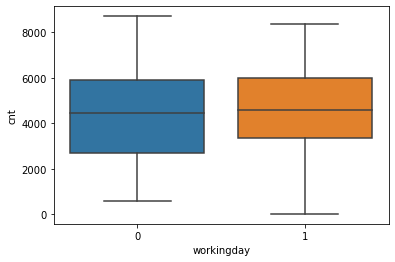

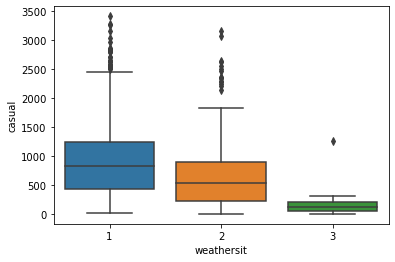

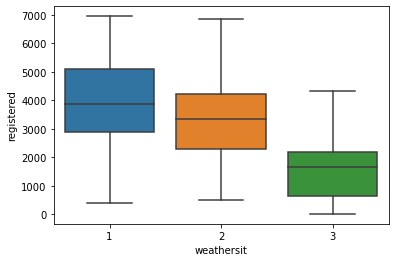

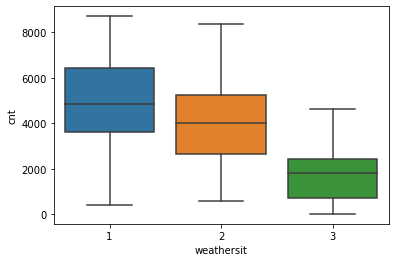

In [625]:
cat_list = ['season','yr','mnth','holiday','weekday','workingday', 'weathersit']
target_var = ['casual','registered','cnt']
for item in cat_list:
    for target in target_var:
        seaborn.boxplot(x = bike[item],y = bike[target], order=list(set(bike[item])))
        plt.savefig('Q3a'+target+'_'+item+'.png',dpi=300,bbox_inches='tight')
        plt.show()

### Suicide Rates Dataset

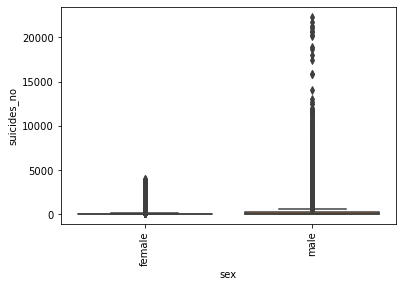

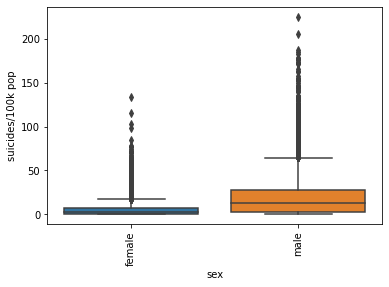

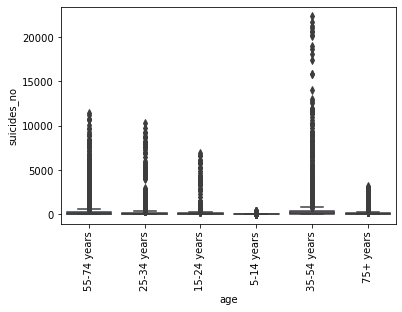

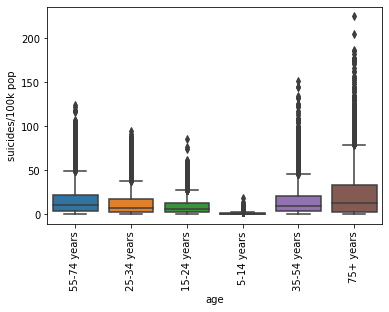

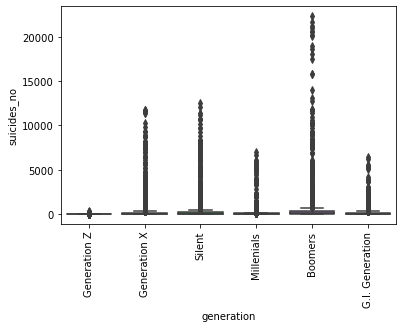

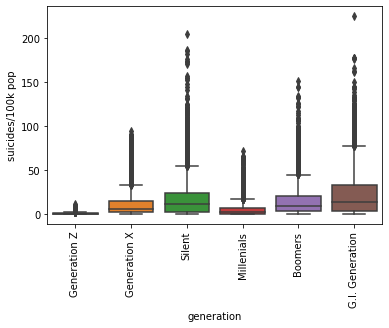

In [626]:
cat_list = ['sex','age','generation']
target_var = ['suicides_no','suicides/100k pop']
for item in cat_list:
    for target in target_var:
        ax = seaborn.boxplot(x = suicide[item],y = suicide[target], order=list(set(suicide[item])))
        plt.setp(ax.get_xticklabels(), rotation=90)
        plt.savefig('Q3b'+target.replace('/','_')+'_'+item+'.png',dpi=300,bbox_inches='tight')
        plt.show()

### Video Transcoding Dataset

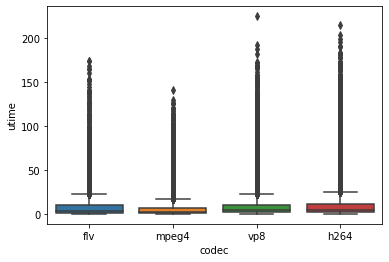

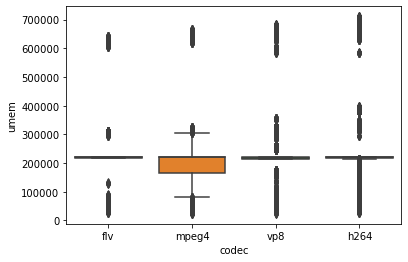

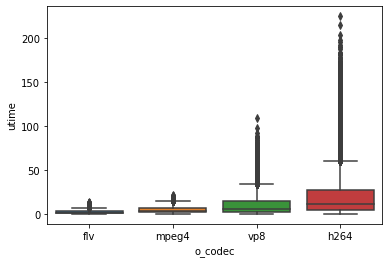

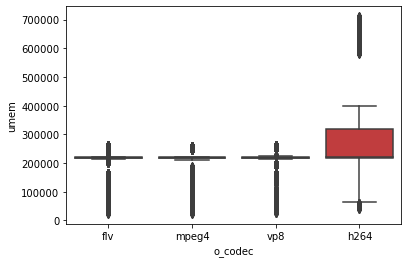

In [9]:
cat_list = ['codec','o_codec']
target_var = ['utime','umem']
for item in cat_list:
    for target in target_var:
        seaborn.boxplot(x = transcode_meas[item],y = transcode_meas[target], order=list(set(transcode_meas[item])))
        plt.savefig('Q3c'+target+'_'+item+'.png',dpi=300,bbox_inches='tight')
        plt.show()

## Question 4

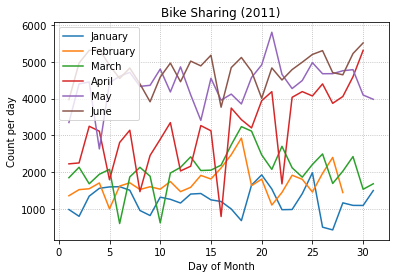

In [628]:
plt.plot(np.arange(1,32,1),bike['cnt'][0:31])
plt.plot(np.arange(1,29,1),bike['cnt'][31:31+28])
plt.plot(np.arange(1,32,1),bike['cnt'][31+28:31+28+31])
plt.plot(np.arange(1,31,1),bike['cnt'][31+28+31:31+28+31+30])
plt.plot(np.arange(1,32,1),bike['cnt'][31+28+31+30:31+28+31+30+31])
plt.plot(np.arange(1,31,1),bike['cnt'][31+28+31+30+31:31+28+31+30+31+30])
plt.legend(['January','February','March','April','May','June'],loc='best')
plt.grid(linestyle=':')
plt.xlabel('Day of Month')
plt.ylabel('Count per day')
plt.title('Bike Sharing (2011)')
plt.savefig('Q4.png',dpi=300,bbox_inches='tight')
plt.show()

## Question 5

In [629]:
country_list = suicide.country.unique()
time_span = []
for item in country_list:
    idx = suicide.country[suicide.country == item].index.tolist()
    idx_range = idx[::len(idx)-1]
    time_span.append(suicide.year[idx_range[1]]-suicide.year[idx_range[0]])
target_country = country_list[sorted(range(len(time_span)), key=lambda i: time_span[i], reverse=True)[:10]]
new_df = suicide[suicide['country'].isin(target_country)]

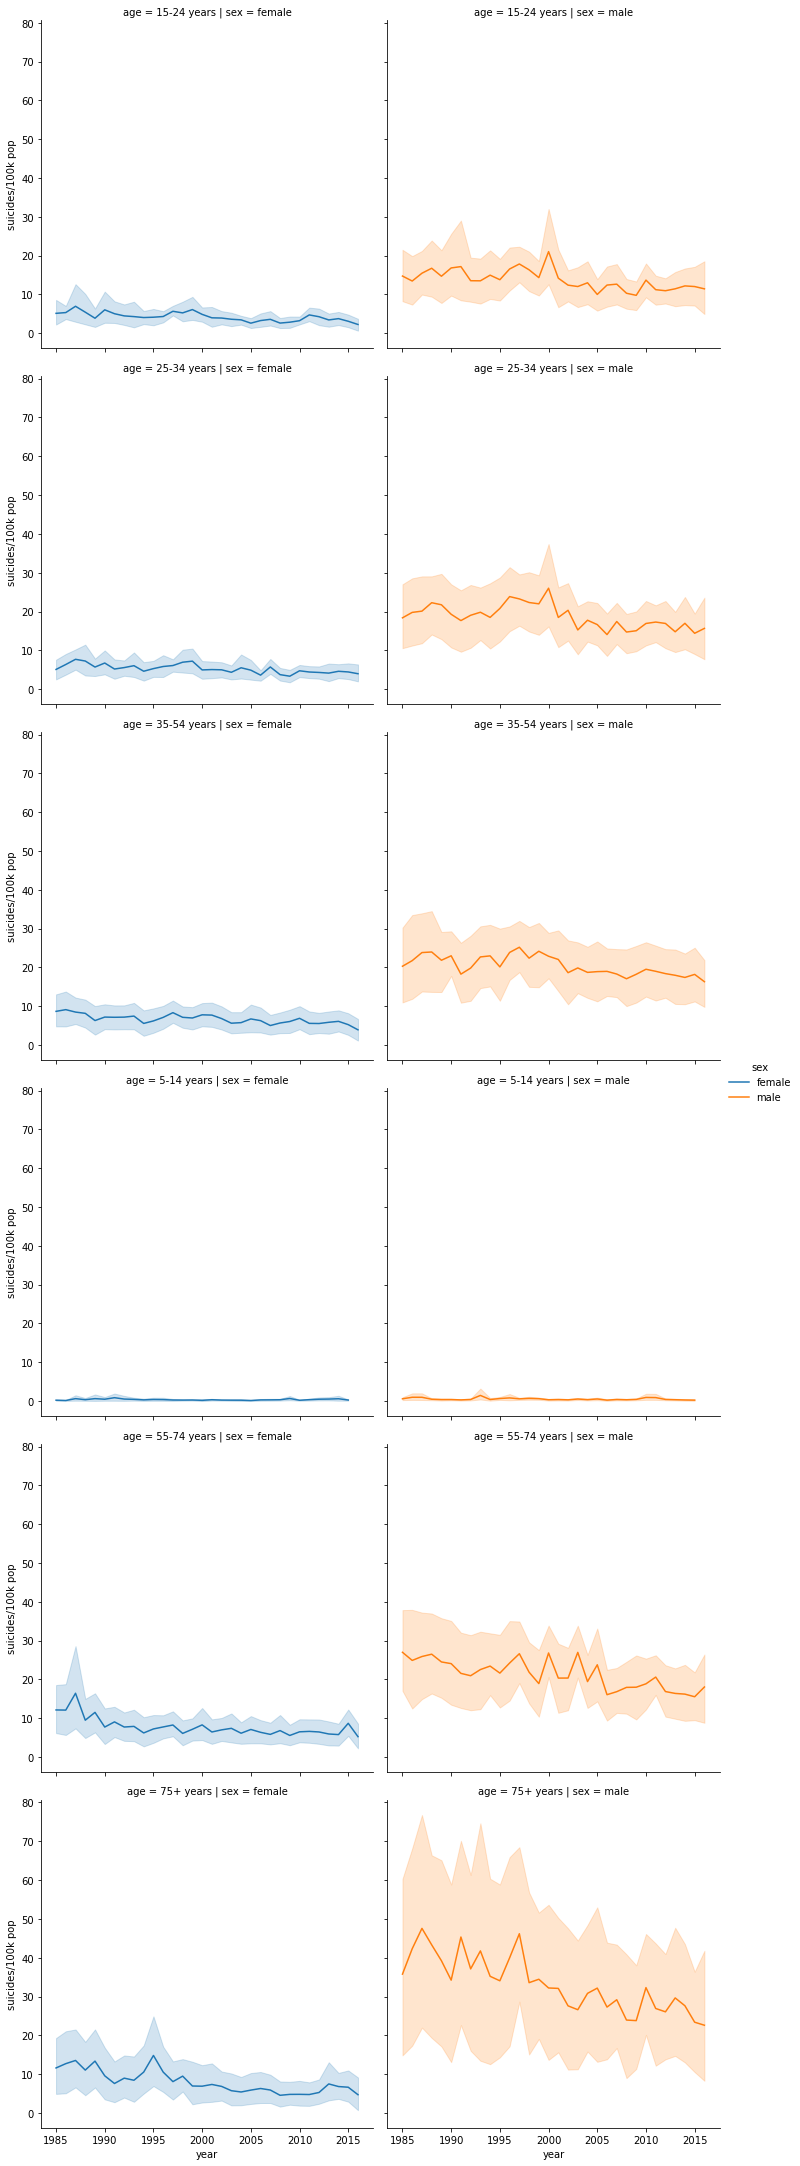

In [634]:
seaborn.relplot(data=new_df, x="year", y="suicides/100k pop",hue="sex",kind="line",row='age',col='sex')
plt.savefig('Q5a.png',dpi=300,bbox_inches='tight')
plt.show()

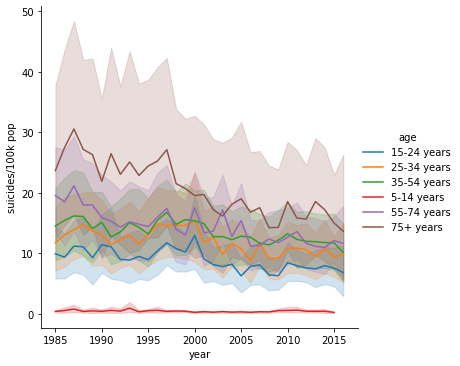

In [635]:
seaborn.relplot(data=new_df, x="year", y="suicides/100k pop",hue="age",kind="line")
plt.savefig('Q5b.png',dpi=300,bbox_inches='tight')
plt.show()

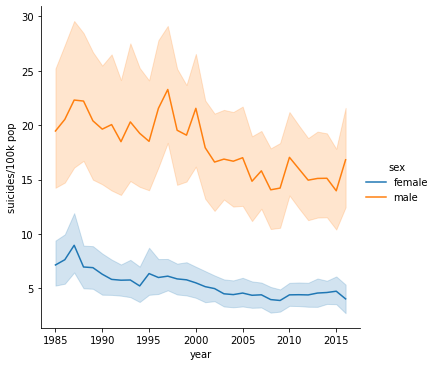

In [636]:
seaborn.relplot(data=new_df, x="year", y="suicides/100k pop", hue="sex",kind="line")
plt.savefig('Q5c.png',dpi=300,bbox_inches='tight')
plt.show()

## Question 7

### Add continent column to Suicides Rates Dataset

In [13]:
continent_name = []

for i in range(len(suicide)):
    if("Korea" not in suicide.country[i] and "Grenadines" not in suicide.country[i]):
        country_code = pc.country_name_to_country_alpha2(suicide.country[i], cn_name_format="default")
        continent_name.append(pc.country_alpha2_to_continent_code(country_code))
    elif("Korea" in suicide.country[i]):
        continent_name.append('AS')
    elif("Grenadines" in suicide.country[i]):
        continent_name.append('NA')
        
suicide['Continent'] = continent_name
print("List of continents:")
print(set(continent_name))
print(suicide)

List of continents:
{'AS', 'EU', 'OC', 'SA', 'NA', 'AF'}
          country  year     sex          age  population   gdp_for_year ($)   \
0         Albania  1987    male  15-24 years      312900          2156624900   
1         Albania  1987    male  35-54 years      308000          2156624900   
2         Albania  1987  female  15-24 years      289700          2156624900   
3         Albania  1987    male    75+ years       21800          2156624900   
4         Albania  1987    male  25-34 years      274300          2156624900   
...           ...   ...     ...          ...         ...                 ...   
27815  Uzbekistan  2014  female  35-54 years     3620833         63067077179   
27816  Uzbekistan  2014  female    75+ years      348465         63067077179   
27817  Uzbekistan  2014    male   5-14 years     2762158         63067077179   
27818  Uzbekistan  2014  female   5-14 years     2631600         63067077179   
27819  Uzbekistan  2014  female  55-74 years     1438935       

### Drop unused target variables and convert categorical variables to one-hot encoding

### Bike Sharing Dataset

In [14]:
bike_LR = bike.drop(['dteday','casual','registered'], axis=1)
bike_LR = pd.get_dummies(bike_LR, columns=['season','mnth','weekday','weathersit'], drop_first=False)
print('Dataframe after one-hot encoding categorical variables:')
print(bike_LR)

Dataframe after one-hot encoding categorical variables:
     yr  holiday  workingday      temp     atemp       hum  windspeed   cnt  \
0     0        0           0  0.344167  0.363625  0.805833   0.160446   985   
1     0        0           0  0.363478  0.353739  0.696087   0.248539   801   
2     0        0           1  0.196364  0.189405  0.437273   0.248309  1349   
3     0        0           1  0.200000  0.212122  0.590435   0.160296  1562   
4     0        0           1  0.226957  0.229270  0.436957   0.186900  1600   
..   ..      ...         ...       ...       ...       ...        ...   ...   
726   1        0           1  0.254167  0.226642  0.652917   0.350133  2114   
727   1        0           1  0.253333  0.255046  0.590000   0.155471  3095   
728   1        0           0  0.253333  0.242400  0.752917   0.124383  1341   
729   1        0           0  0.255833  0.231700  0.483333   0.350754  1796   
730   1        0           1  0.215833  0.223487  0.577500   0.154846  2729

### Suicide Rates Dataset

In [15]:
suicide_LR = suicide.drop(['country','suicides_no'], axis=1)
suicide_LR = pd.get_dummies(suicide_LR, columns=['sex','age','generation','Continent'], drop_first=False)
print('Dataframe after one-hot encoding categorical variables:')
print(suicide_LR)

Dataframe after one-hot encoding categorical variables:
       year  population   gdp_for_year ($)   gdp_per_capita ($)  \
0      1987      312900          2156624900                 796   
1      1987      308000          2156624900                 796   
2      1987      289700          2156624900                 796   
3      1987       21800          2156624900                 796   
4      1987      274300          2156624900                 796   
...     ...         ...                 ...                 ...   
27815  2014     3620833         63067077179                2309   
27816  2014      348465         63067077179                2309   
27817  2014     2762158         63067077179                2309   
27818  2014     2631600         63067077179                2309   
27819  2014     1438935         63067077179                2309   

       suicides/100k pop  sex_female  sex_male  age_15-24 years  \
0                   6.71           0         1                1   
1    

### Video Transcoding Dataset

In [16]:
transcode_LR = transcode_meas.drop(['b_size','umem'], axis=1)
transcode_LR = pd.get_dummies(transcode_LR, columns=['codec','o_codec'], drop_first=False)
print('Dataframe after one-hot encoding categorical variables:')
print(transcode_LR)

Dataframe after one-hot encoding categorical variables:
        duration  width  height  bitrate  framerate    i      p  b  frames  \
0      130.35667    176     144    54590  12.000000   27   1537  0    1564   
1      130.35667    176     144    54590  12.000000   27   1537  0    1564   
2      130.35667    176     144    54590  12.000000   27   1537  0    1564   
3      130.35667    176     144    54590  12.000000   27   1537  0    1564   
4      130.35667    176     144    54590  12.000000   27   1537  0    1564   
...          ...    ...     ...      ...        ...  ...    ... ..     ...   
68779  972.27100    480     360   278822  29.000000  560  28580  0   29140   
68780  129.88100    640     480   639331  30.162790   36   3855  0    3891   
68781  249.68000    320     240   359345  25.068274  129   6113  0    6242   
68782  183.62334   1280     720  2847539  29.000000   98   5405  0    5503   
68783  294.61334    176     144    55242  12.000000   61   3474  0    3535   

       

## Question 8

### Extract training variables and target values

In [17]:
XBike = bike_LR.loc[:, bike_LR.columns != 'cnt'].to_numpy()
YBike = bike_LR.cnt
XSuicide = suicide_LR.loc[:, suicide_LR.columns != 'suicides/100k pop'].to_numpy()
YSuicide = suicide_LR["suicides/100k pop"]
XTranscode = transcode_LR.loc[:,  transcode_LR.columns != 'utime'].to_numpy()
YTranscode = transcode_LR["utime"]

### Scaling

In [18]:
bike_scale = StandardScaler()
XBike_S = bike_scale.fit_transform(XBike)
suicide_scale = StandardScaler()
XSuicide_S = suicide_scale.fit_transform(XSuicide)
transcode_scale = StandardScaler()
XTranscode_S = transcode_scale.fit_transform(XTranscode)

## Question 9

### Testing Feature Selection with Default Hyperparameters for Linear, Ridge and Lasso Regression

In [19]:
bike_RMSE_MIR = []
bike_RMSE_FR = []
Suicide_RMSE_FR = []
Transcode_RMSE_FR = []

bike_RMSE_MIR_RR = []
bike_RMSE_FR_RR = []
Suicide_RMSE_FR_RR = []
Transcode_RMSE_FR_RR = []

bike_RMSE_MIR_LR = []
bike_RMSE_FR_LR = []
Suicide_RMSE_FR_LR = []
Transcode_RMSE_FR_LR = []


for i in range(1,XBike.shape[1]):
    print('Testing LR, bike dataset for k = ', i)
    XBikeCur_M = SelectKBest(score_func=mutual_info_regression, k=i).fit_transform(XBike, YBike)
    XBikeCur_F = SelectKBest(score_func=f_regression, k=i).fit_transform(XBike, YBike)
    
    BikeOut = cross_validate(LinearRegression(), XBikeCur_M, YBike, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1)
    bike_RMSE_MIR.append(BikeOut['test_neg_root_mean_squared_error'].mean())
    BikeOut = cross_validate(LinearRegression(), XBikeCur_F, YBike, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1)
    bike_RMSE_FR.append(BikeOut['test_neg_root_mean_squared_error'].mean())
    
    print('Testing RR, bike dataset for k = ', i)
    BikeOut = cross_validate(Ridge(), XBikeCur_M, YBike, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1)
    bike_RMSE_MIR_RR.append(BikeOut['test_neg_root_mean_squared_error'].mean())
    BikeOut = cross_validate(Ridge(), XBikeCur_F, YBike, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1)
    bike_RMSE_FR_RR.append(BikeOut['test_neg_root_mean_squared_error'].mean())
    
    print('Testing LaR, bike dataset for k = ', i)
    BikeOut = cross_validate(Lasso(), XBikeCur_M, YBike, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1)
    bike_RMSE_MIR_LR.append(BikeOut['test_neg_root_mean_squared_error'].mean())
    BikeOut = cross_validate(Lasso(), XBikeCur_F, YBike, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1)
    bike_RMSE_FR_LR.append(BikeOut['test_neg_root_mean_squared_error'].mean())

Testing LR, bike dataset for k =  1
Testing RR, bike dataset for k =  1
Testing LaR, bike dataset for k =  1
Testing LR, bike dataset for k =  2
Testing RR, bike dataset for k =  2
Testing LaR, bike dataset for k =  2
Testing LR, bike dataset for k =  3
Testing RR, bike dataset for k =  3
Testing LaR, bike dataset for k =  3
Testing LR, bike dataset for k =  4
Testing RR, bike dataset for k =  4
Testing LaR, bike dataset for k =  4
Testing LR, bike dataset for k =  5
Testing RR, bike dataset for k =  5
Testing LaR, bike dataset for k =  5
Testing LR, bike dataset for k =  6
Testing RR, bike dataset for k =  6
Testing LaR, bike dataset for k =  6
Testing LR, bike dataset for k =  7
Testing RR, bike dataset for k =  7
Testing LaR, bike dataset for k =  7
Testing LR, bike dataset for k =  8
Testing RR, bike dataset for k =  8
Testing LaR, bike dataset for k =  8
Testing LR, bike dataset for k =  9
Testing RR, bike dataset for k =  9
Testing LaR, bike dataset for k =  9
Testing LR, bike da

In [20]:
for i in range(1,XSuicide.shape[1]):
    print('Testing LR, Suicide dataset for k = ', i)
    XSuicideCur_F = SelectKBest(score_func=f_regression, k=i).fit_transform(XSuicide, YSuicide)
    
    SuicideOut = cross_validate(LinearRegression(), XSuicideCur_F, YSuicide, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1)
    Suicide_RMSE_FR.append(SuicideOut['test_neg_root_mean_squared_error'].mean())
    
    print('Testing RR, Suicide dataset for k = ', i)
    SuicideOut = cross_validate(Ridge(), XSuicideCur_F, YSuicide, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1)
    Suicide_RMSE_FR_RR.append(SuicideOut['test_neg_root_mean_squared_error'].mean())
    
    print('Testing LaR, Suicide dataset for k = ', i)
    SuicideOut = cross_validate(Lasso(), XSuicideCur_F, YSuicide, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1)
    Suicide_RMSE_FR_LR.append(SuicideOut['test_neg_root_mean_squared_error'].mean())

Testing LR, Suicide dataset for k =  1
Testing RR, Suicide dataset for k =  1
Testing LaR, Suicide dataset for k =  1
Testing LR, Suicide dataset for k =  2
Testing RR, Suicide dataset for k =  2
Testing LaR, Suicide dataset for k =  2
Testing LR, Suicide dataset for k =  3
Testing RR, Suicide dataset for k =  3
Testing LaR, Suicide dataset for k =  3
Testing LR, Suicide dataset for k =  4
Testing RR, Suicide dataset for k =  4
Testing LaR, Suicide dataset for k =  4
Testing LR, Suicide dataset for k =  5
Testing RR, Suicide dataset for k =  5
Testing LaR, Suicide dataset for k =  5
Testing LR, Suicide dataset for k =  6
Testing RR, Suicide dataset for k =  6
Testing LaR, Suicide dataset for k =  6
Testing LR, Suicide dataset for k =  7
Testing RR, Suicide dataset for k =  7
Testing LaR, Suicide dataset for k =  7
Testing LR, Suicide dataset for k =  8
Testing RR, Suicide dataset for k =  8
Testing LaR, Suicide dataset for k =  8
Testing LR, Suicide dataset for k =  9
Testing RR, Suici

In [21]:
for i in range(1,XTranscode.shape[1]):
    print('Testing LR, Transcode dataset for k = ', i)
    XTranscodeCur_F = SelectKBest(score_func=f_regression, k=i).fit_transform(XTranscode, YTranscode)
    
    TranscodeOut = cross_validate(LinearRegression(), XTranscodeCur_F, YTranscode, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1)
    Transcode_RMSE_FR.append(TranscodeOut['test_neg_root_mean_squared_error'].mean())
    
    print('Testing RR, Transcode dataset for k = ', i)
    TranscodeOut = cross_validate(Ridge(), XTranscodeCur_F, YTranscode, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1)
    Transcode_RMSE_FR_RR.append(TranscodeOut['test_neg_root_mean_squared_error'].mean())
    
    print('Testing LaR, Transcode dataset for k = ', i)
    TranscodeOut = cross_validate(Lasso(), XTranscodeCur_F, YTranscode, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1)
    Transcode_RMSE_FR_LR.append(TranscodeOut['test_neg_root_mean_squared_error'].mean())

Testing LR, Transcode dataset for k =  1
Testing RR, Transcode dataset for k =  1
Testing LaR, Transcode dataset for k =  1
Testing LR, Transcode dataset for k =  2
Testing RR, Transcode dataset for k =  2
Testing LaR, Transcode dataset for k =  2
Testing LR, Transcode dataset for k =  3
Testing RR, Transcode dataset for k =  3
Testing LaR, Transcode dataset for k =  3
Testing LR, Transcode dataset for k =  4
Testing RR, Transcode dataset for k =  4
Testing LaR, Transcode dataset for k =  4
Testing LR, Transcode dataset for k =  5
Testing RR, Transcode dataset for k =  5
Testing LaR, Transcode dataset for k =  5
Testing LR, Transcode dataset for k =  6
Testing RR, Transcode dataset for k =  6
Testing LaR, Transcode dataset for k =  6
Testing LR, Transcode dataset for k =  7
Testing RR, Transcode dataset for k =  7
Testing LaR, Transcode dataset for k =  7
Testing LR, Transcode dataset for k =  8
Testing RR, Transcode dataset for k =  8
Testing LaR, Transcode dataset for k =  8
Testing 

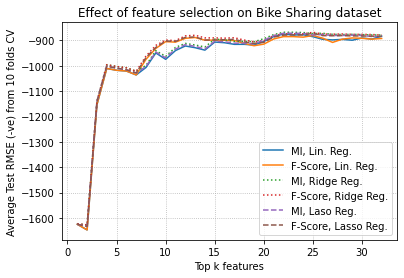

In [22]:
plt.plot(np.arange(1,len(bike_RMSE_MIR)+1,1),bike_RMSE_MIR)
plt.plot(np.arange(1,len(bike_RMSE_FR)+1,1),bike_RMSE_FR)
plt.plot(np.arange(1,len(bike_RMSE_MIR_RR)+1,1),bike_RMSE_MIR_RR,':')
plt.plot(np.arange(1,len(bike_RMSE_FR_RR)+1,1),bike_RMSE_FR_RR,':')
plt.plot(np.arange(1,len(bike_RMSE_MIR_LR)+1,1),bike_RMSE_MIR_LR,'--')
plt.plot(np.arange(1,len(bike_RMSE_FR_LR)+1,1),bike_RMSE_FR_LR,'--')
plt.legend(['MI, Lin. Reg.','F-Score, Lin. Reg.','MI, Ridge Reg.',
            'F-Score, Ridge Reg.','MI, Laso Reg.','F-Score, Lasso Reg.'],loc='best')
plt.grid(linestyle=':')
plt.xlabel('Top k features')
plt.ylabel('Average Test RMSE (-ve) from 10 folds CV')
plt.title('Effect of feature selection on Bike Sharing dataset')
plt.savefig('Q9a.png',dpi=300,bbox_inches='tight')
plt.show()

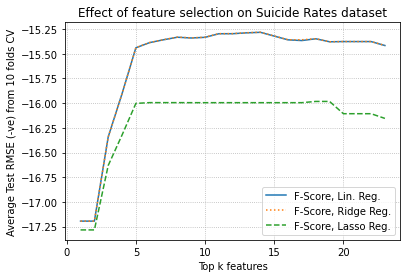

In [23]:
plt.plot(np.arange(1,len(Suicide_RMSE_FR)+1,1),Suicide_RMSE_FR)
plt.plot(np.arange(1,len(Suicide_RMSE_FR_RR)+1,1),Suicide_RMSE_FR_RR,':')
plt.plot(np.arange(1,len(Suicide_RMSE_FR_LR)+1,1),Suicide_RMSE_FR_LR,'--')
plt.legend(['F-Score, Lin. Reg.','F-Score, Ridge Reg.','F-Score, Lasso Reg.'],loc='best')
plt.grid(linestyle=':')
plt.xlabel('Top k features')
plt.ylabel('Average Test RMSE (-ve) from 10 folds CV')
plt.title('Effect of feature selection on Suicide Rates dataset')
plt.savefig('Q9b.png',dpi=300,bbox_inches='tight')
plt.show()

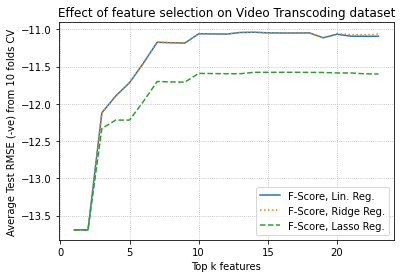

In [24]:
plt.plot(np.arange(1,len(Transcode_RMSE_FR)+1,1),Transcode_RMSE_FR)
plt.plot(np.arange(1,len(Transcode_RMSE_FR_RR)+1,1),Transcode_RMSE_FR_RR,':')
plt.plot(np.arange(1,len(Transcode_RMSE_FR_LR)+1,1),Transcode_RMSE_FR_LR,'--')
plt.legend(['F-Score, Lin. Reg.','F-Score, Ridge Reg.','F-Score, Lasso Reg.'],loc='best')
plt.grid(linestyle=':')
plt.xlabel('Top k features')
plt.ylabel('Average Test RMSE (-ve) from 10 folds CV')
plt.title('Effect of feature selection on Video Transcoding dataset')
plt.savefig('Q9c.png',dpi=300,bbox_inches='tight')
plt.show()

## Question 10 to 13

In [25]:
k_val = 10

XBikeCur_F = SelectKBest(score_func=f_regression, k=k_val).fit_transform(XBike, YBike)
XBikeCur_MIR = SelectKBest(score_func=mutual_info_regression, k=k_val).fit_transform(XBike, YBike)
XBikeCur_FS = SelectKBest(score_func=f_regression, k=k_val).fit_transform(XBike_S, YBike)
XBikeCur_MIRS = SelectKBest(score_func=mutual_info_regression, k=k_val).fit_transform(XBike_S, YBike)

XSuicideCur_F = SelectKBest(score_func=f_regression, k=k_val).fit_transform(XSuicide, YSuicide)
XSuicideCur_FS = SelectKBest(score_func=f_regression, k=k_val).fit_transform(XSuicide_S, YSuicide)

XTranscodeCur_F = SelectKBest(score_func=f_regression, k=k_val).fit_transform(XTranscode, YTranscode)
XTranscodeCur_FS = SelectKBest(score_func=f_regression, k=k_val).fit_transform(XTranscode_S, YTranscode)

### Linear Regression

In [38]:
BikeOut = cross_validate(LinearRegression(), XBikeCur_F, YBike, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1,return_train_score=True)
print('• No standardization, bike dataset, F1, linear regression: Test=',BikeOut['test_neg_root_mean_squared_error'].mean(),',Train=',BikeOut['train_neg_root_mean_squared_error'].mean())
BikeOut = cross_validate(LinearRegression(), XBikeCur_MIR, YBike, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1,return_train_score=True)
print('• No standardization, bike dataset, MI, linear regression: Test=',BikeOut['test_neg_root_mean_squared_error'].mean(),',Train=',BikeOut['train_neg_root_mean_squared_error'].mean())
BikeOut = cross_validate(LinearRegression(), XBikeCur_FS, YBike, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1,return_train_score=True)
print('• Standardization, bike dataset, F1, linear regression:  Test=',BikeOut['test_neg_root_mean_squared_error'].mean(),',Train=',BikeOut['train_neg_root_mean_squared_error'].mean())
BikeOut = cross_validate(LinearRegression(), XBikeCur_MIRS, YBike, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1,return_train_score=True)
print('• Standardization, bike dataset, MI, linear regression: Test=',BikeOut['test_neg_root_mean_squared_error'].mean(),',Train=',BikeOut['train_neg_root_mean_squared_error'].mean())

SuicideOut = cross_validate(LinearRegression(), XSuicideCur_F, YSuicide, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1,return_train_score=True)
print('• No standardization, Suicide dataset, F1, linear regression: Test=',SuicideOut['test_neg_root_mean_squared_error'].mean(),',Train=',SuicideOut['train_neg_root_mean_squared_error'].mean())
SuicideOut = cross_validate(LinearRegression(), XSuicideCur_FS, YSuicide, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1,return_train_score=True)
print('• Standardization, Suicide dataset, F1, linear regression: Test=',SuicideOut['test_neg_root_mean_squared_error'].mean(),',Train=',SuicideOut['train_neg_root_mean_squared_error'].mean())

TranscodeOut = cross_validate(LinearRegression(), XTranscodeCur_F, YTranscode, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1,return_train_score=True)
print('• No standardization, Transcode dataset, F1, linear regression: Test=',TranscodeOut['test_neg_root_mean_squared_error'].mean(),',Train=',TranscodeOut['train_neg_root_mean_squared_error'].mean())
TranscodeOut = cross_validate(LinearRegression(), XTranscodeCur_FS, YTranscode, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1,return_train_score=True)
print('• Standardization, Transcode dataset, F1, linear regression: Test=',TranscodeOut['test_neg_root_mean_squared_error'].mean(),',Train=',TranscodeOut['train_neg_root_mean_squared_error'].mean())

• No standardization, bike dataset, F1, linear regression: Test= -904.875354514855 ,Train= -836.3621038950808
• No standardization, bike dataset, MI, linear regression: Test= -974.4892680662463 ,Train= -871.9979472259711
• Standardization, bike dataset, F1, linear regression:  Test= -904.8753545148545 ,Train= -836.3621038950808
• Standardization, bike dataset, MI, linear regression: Test= -974.4892680662466 ,Train= -871.9979472259711
• No standardization, Suicide dataset, F1, linear regression: Test= -15.333207286266429 ,Train= -15.42061968119477
• Standardization, Suicide dataset, F1, linear regression: Test= -15.332744465450682 ,Train= -15.420589566680139
• No standardization, Transcode dataset, F1, linear regression: Test= -11.059454228951019 ,Train= -11.038710923489962
• Standardization, Transcode dataset, F1, linear regression: Test= -11.059454228951008 ,Train= -11.038710923489962


### Ridge Regression

In [39]:
pipe_RR = Pipeline([('model', Ridge(random_state=42))])
param_grid = {
    'model__alpha': [10.0**x for x in np.arange(-4,4)]
}

In [40]:
print("Testing bike..\n")
gridBikeRR_F = GridSearchCV(pipe_RR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XBikeCur_F, YBike)
gridBikeRR_FS = GridSearchCV(pipe_RR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XBikeCur_FS, YBike)
gridBikeRR_M = GridSearchCV(pipe_RR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XBikeCur_MIR, YBike)
gridBikeRR_MS = GridSearchCV(pipe_RR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XBikeCur_MIRS, YBike)
print("Testing suicide..\n")
gridSuicideRR_F = GridSearchCV(pipe_RR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XSuicideCur_F, YSuicide)
gridSuicideRR_FS = GridSearchCV(pipe_RR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XSuicideCur_FS, YSuicide)
print("Testing transcoding..\n")
gridTranscodeRR_F = GridSearchCV(pipe_RR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XTranscodeCur_F, YTranscode)
gridTranscodeRR_FS = GridSearchCV(pipe_RR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XTranscodeCur_FS, YTranscode)

Testing bike..

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Testing suicide..

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Testing transcoding..

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished


In [54]:
print('• No standardization, bike dataset, F1, ridge reg., Test RMSE:',gridBikeRR_F.best_score_,
      ',alpha:',gridBikeRR_F.best_params_,'train RMSE',max(gridBikeRR_F.cv_results_['mean_train_score']))
print('• Standardization, bike dataset, F1, ridge reg., Test RMSE:',gridBikeRR_FS.best_score_,
      ',alpha:',gridBikeRR_FS.best_params_,'train RMSE',max(gridBikeRR_FS.cv_results_['mean_train_score']))
print('• No standardization, bike dataset, MI, ridge reg., Test RMSE:',gridBikeRR_M.best_score_,
      ',alpha:',gridBikeRR_F.best_params_,'train RMSE',max(gridBikeRR_M.cv_results_['mean_train_score']))
print('• Standardization, bike dataset, MI, ridge reg., Test RMSE:',gridBikeRR_MS.best_score_,
      ',alpha:',gridBikeRR_MS.best_params_,'train RMSE',max(gridBikeRR_MS.cv_results_['mean_train_score']))
print('• No standardization, suicide dataset, F1, ridge reg., Test RMSE:',gridSuicideRR_F.best_score_,
      ',alpha:',gridSuicideRR_F.best_params_,'train RMSE',max(gridSuicideRR_F.cv_results_['mean_train_score']))
print('• Standardization, suicide dataset, F1, ridge reg., Test RMSE:',gridSuicideRR_FS.best_score_,
      ',alpha:',gridSuicideRR_FS.best_params_,'train RMSE',max(gridSuicideRR_FS.cv_results_['mean_train_score']))
print('• No standardization, transcoding dataset, F1, ridge reg., Test RMSE:',gridTranscodeRR_F.best_score_,
      ',alpha:',gridTranscodeRR_F.best_params_,'train RMSE',max(gridTranscodeRR_F.cv_results_['mean_train_score']))
print('• Standardization, transcoding dataset, F1, ridge reg., Test RMSE:',gridTranscodeRR_FS.best_score_,
      ',alpha:',gridTranscodeRR_FS.best_params_,'train RMSE',max(gridTranscodeRR_FS.cv_results_['mean_train_score']))

• No standardization, bike dataset, F1, ridge reg., Test RMSE: -892.70230942667 ,alpha: {'model__alpha': 10.0} train RMSE -836.3621041845709
• Standardization, bike dataset, F1, ridge reg., Test RMSE: -878.1469958606837 ,alpha: {'model__alpha': 100.0} train RMSE -836.3621038954203
• No standardization, bike dataset, MI, ridge reg., Test RMSE: -962.7636703128888 ,alpha: {'model__alpha': 10.0} train RMSE -871.9979474460961
• Standardization, bike dataset, MI, ridge reg., Test RMSE: -935.7339113922999 ,alpha: {'model__alpha': 100.0} train RMSE -871.9979472261564
• No standardization, suicide dataset, F1, ridge reg., Test RMSE: -15.32570785324082 ,alpha: {'model__alpha': 1000.0} train RMSE -15.42018215133271
• Standardization, suicide dataset, F1, ridge reg., Test RMSE: -15.322322304708754 ,alpha: {'model__alpha': 1000.0} train RMSE -15.42018215133271
• No standardization, transcoding dataset, F1, ridge reg., Test RMSE: -11.059236787276069 ,alpha: {'model__alpha': 100.0} train RMSE -11.038

### Lasso Regression

In [55]:
pipe_LAR = Pipeline([('model', Lasso(random_state=42))])
param_grid = {
    'model__alpha': [10.0**x for x in np.arange(-4,4)]
}

In [56]:
print("Testing bike..\n")
gridBikeLAR_F = GridSearchCV(pipe_LAR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XBikeCur_F, YBike)
gridBikeLAR_FS = GridSearchCV(pipe_LAR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XBikeCur_FS, YBike)
gridBikeLAR_M = GridSearchCV(pipe_LAR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XBikeCur_MIR, YBike)
gridBikeLAR_MS = GridSearchCV(pipe_LAR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XBikeCur_MIRS, YBike)
print("Testing suicide..\n")
gridSuicideLAR_F = GridSearchCV(pipe_LAR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XSuicideCur_F, YSuicide)
gridSuicideLAR_FS = GridSearchCV(pipe_LAR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XSuicideCur_FS, YSuicide)
print("Testing transcoding..\n")
gridTranscodeLAR_F = GridSearchCV(pipe_LAR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XTranscodeCur_F, YTranscode)
gridTranscodeLAR_FS = GridSearchCV(pipe_LAR, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XTranscodeCur_FS, YTranscode)

Testing bike..

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Fitting 10 folds for each of 8 candidates, totalling 80 fits
Testing suicide..

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Testing transcoding..

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   12.9s finished


Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.2s finished


In [57]:
print('• No standardization, bike dataset, F1, lasso reg., Test RMSE:',gridBikeLAR_F.best_score_,
      ',alpha:',gridBikeLAR_F.best_params_,'train RMSE',max(gridBikeLAR_F.cv_results_['mean_train_score']))
print('• Standardization, bike dataset, F1, lasso reg., Test RMSE:',gridBikeLAR_FS.best_score_,
      ',alpha:',gridBikeLAR_FS.best_params_,'train RMSE',max(gridBikeLAR_FS.cv_results_['mean_train_score']))
print('• No standardization, bike dataset, MI, lasso reg., Test RMSE:',gridBikeLAR_M.best_score_,
      ',alpha:',gridBikeLAR_F.best_params_,'train RMSE',max(gridBikeLAR_F.cv_results_['mean_train_score']))
print('• Standardization, bike dataset, MI, lasso reg., Test RMSE:',gridBikeLAR_MS.best_score_,
      ',alpha:',gridBikeLAR_MS.best_params_,'train RMSE',max(gridBikeLAR_MS.cv_results_['mean_train_score']))
print('• No standardization, suicide dataset, F1, lasso reg., Test RMSE:',gridSuicideLAR_F.best_score_,
      ',alpha:',gridSuicideLAR_F.best_params_,'train RMSE',max(gridSuicideLAR_F.cv_results_['mean_train_score']))
print('• Standardization, suicide dataset, F1, lasso reg., Test RMSE:',gridSuicideLAR_FS.best_score_,
      ',alpha:',gridSuicideLAR_FS.best_params_,'train RMSE',max(gridSuicideLAR_FS.cv_results_['mean_train_score']))
print('• No standardization, transcoding dataset, F1, lasso reg., Test RMSE:',gridTranscodeLAR_F.best_score_,
      ',alpha:',gridTranscodeLAR_F.best_params_,'train RMSE',max(gridTranscodeLAR_F.cv_results_['mean_train_score']))
print('• Standardization, transcoding dataset, F1, lasso reg., Test RMSE:',gridTranscodeLAR_FS.best_score_,
      ',alpha:',gridTranscodeLAR_FS.best_params_,'train RMSE',max(gridTranscodeLAR_FS.cv_results_['mean_train_score']))

• No standardization, bike dataset, F1, lasso reg., Test RMSE: -899.5074463695244 ,alpha: {'model__alpha': 10.0} train RMSE -836.3621040837518
• Standardization, bike dataset, F1, lasso reg., Test RMSE: -897.4951623793668 ,alpha: {'model__alpha': 10.0} train RMSE -836.3621040459991
• No standardization, bike dataset, MI, lasso reg., Test RMSE: -952.3265864115558 ,alpha: {'model__alpha': 10.0} train RMSE -836.3621040837518
• Standardization, bike dataset, MI, lasso reg., Test RMSE: -946.5350865872509 ,alpha: {'model__alpha': 100.0} train RMSE -871.9979499730189
• No standardization, suicide dataset, F1, lasso reg., Test RMSE: -15.330688655388517 ,alpha: {'model__alpha': 0.01} train RMSE -15.420182168435108
• Standardization, suicide dataset, F1, lasso reg., Test RMSE: -15.32750979337663 ,alpha: {'model__alpha': 0.1} train RMSE -15.42018215325216
• No standardization, transcoding dataset, F1, lasso reg., Test RMSE: -11.059330236660127 ,alpha: {'model__alpha': 0.01} train RMSE -11.0387109

### p-value example

In [58]:
p_ex = OLS(YSuicide, suicide_LR.loc[:, suicide_LR.columns != 'suicides/100k pop']).fit()
print(p_ex.pvalues.sort_values(ascending=True))

gdp_per_capita ($)            8.766941e-48
 gdp_for_year ($)             1.003279e-11
age_75+ years                 1.078009e-06
Continent_EU                  4.850388e-06
age_55-74 years               7.534267e-05
sex_male                      9.415642e-05
generation_G.I. Generation    1.003124e-04
age_35-54 years               1.274671e-04
Continent_OC                  1.912970e-04
Continent_AS                  3.764538e-04
generation_Boomers            3.824482e-04
generation_Generation Z       4.133131e-04
generation_Silent             4.412699e-04
age_25-34 years               4.422605e-04
Continent_SA                  4.666982e-04
generation_Generation X       4.824022e-04
generation_Millenials         6.498364e-04
year                          1.026107e-03
sex_female                    1.279165e-03
age_15-24 years               1.978574e-03
Continent_AF                  2.456121e-03
Continent_NA                  2.921954e-03
population                    7.801250e-03
age_5-14 ye

## Question 14 to 16

### Finding optimal degree

In [59]:
degree_list = np.arange(1,11,1)

pipe_PR_bike = Pipeline([
    ('PR', PolynomialFeatures()),
    ('model', Ridge(random_state=42))
])

pipe_PR_suicide = Pipeline([
    ('PR', PolynomialFeatures()),
    ('model', Ridge(random_state=42))
])

pipe_PR_transcode = Pipeline([
    ('PR', PolynomialFeatures()),
    ('model', Ridge(random_state=42))
])

param_grid_PR = {
    'PR__degree': degree_list,
    'model__alpha': [10.0**x for x in np.arange(-4,4)]
    
}

In [60]:
gridbike_PR = GridSearchCV(pipe_PR_bike, param_grid=param_grid_PR, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XBikeCur_F,YBike)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  2.1min finished


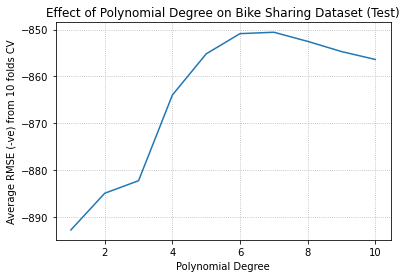

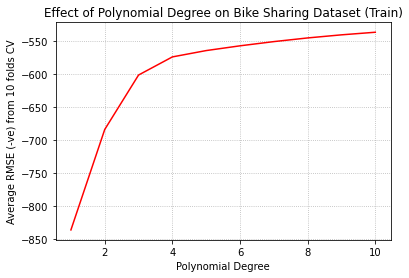

In [69]:
poly_result = pd.DataFrame(gridbike_PR.cv_results_)[['mean_test_score','mean_train_score','param_PR__degree','param_model__alpha']]
bike_score = []
bike_train = []
bike_alpha = []
for i in degree_list:
    bike_score.append((poly_result.loc[poly_result['param_PR__degree'] == i]).max().mean_test_score)
    bike_train.append((poly_result.loc[poly_result['param_PR__degree'] == i]).max().mean_train_score)
    bike_alpha.append(float(poly_result['param_model__alpha'][
        (poly_result.loc[poly_result['param_PR__degree'] == i])
        [['mean_test_score']].idxmax()].to_numpy()))
plt.plot(degree_list,bike_score)
plt.grid(linestyle=':')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of Polynomial Degree on Bike Sharing Dataset (Test)')
plt.savefig('Q15a.png',dpi=300,bbox_inches='tight')
plt.show()
plt.plot(degree_list,bike_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of Polynomial Degree on Bike Sharing Dataset (Train)')
plt.savefig('Q15b.png',dpi=300,bbox_inches='tight')
plt.show()

In [70]:
degree_list = np.arange(1,6,1)
param_grid_PR = {
    'PR__degree': degree_list,
    'model__alpha': [10.0**x for x in np.arange(-4,4)]
    
}

gridSuicide_PR = GridSearchCV(pipe_PR_suicide, param_grid=param_grid_PR, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XSuicideCur_F,YSuicide)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.6min finished


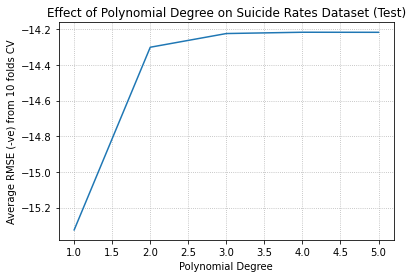

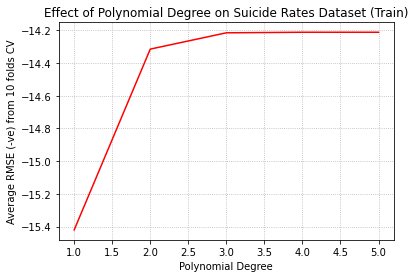

In [71]:
poly_result = pd.DataFrame(gridSuicide_PR.cv_results_)[['mean_test_score','mean_train_score','param_PR__degree','param_model__alpha']]
suicide_score = []
suicide_train = []
suicide_alpha = []
for i in degree_list:
    suicide_score.append((poly_result.loc[poly_result['param_PR__degree'] == i]).max().mean_test_score)
    suicide_train.append((poly_result.loc[poly_result['param_PR__degree'] == i]).max().mean_train_score)
    suicide_alpha.append(float(poly_result['param_model__alpha'][
        (poly_result.loc[poly_result['param_PR__degree'] == i])
        [['mean_test_score']].idxmax()].to_numpy()))
plt.plot(degree_list,suicide_score)
plt.grid(linestyle=':')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of Polynomial Degree on Suicide Rates Dataset (Test)')
plt.savefig('Q15c.png',dpi=300,bbox_inches='tight')
plt.show()
plt.plot(degree_list,suicide_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of Polynomial Degree on Suicide Rates Dataset (Train)')
plt.savefig('Q15d.png',dpi=300,bbox_inches='tight')
plt.show()

In [72]:
degree_list = np.arange(1,5,1)
param_grid_PR = {
    'PR__degree': degree_list,
    'model__alpha': [10.0**x for x in np.arange(-4,4)]
    
}

gridTranscode_PR = GridSearchCV(pipe_PR_transcode, param_grid=param_grid_PR, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XTranscodeCur_F,YTranscode)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 257 out of 320 | elapsed:  3.7min remaining:   54.8s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  6.8min finished
/home/nesl/anaconda3/envs/tflite/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.6857e-30): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


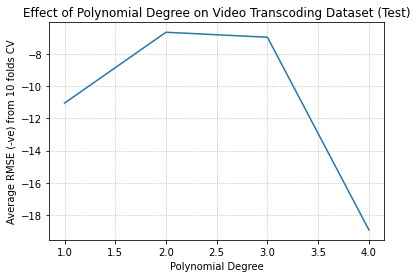

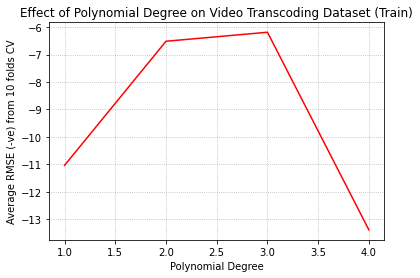

In [73]:
poly_result = pd.DataFrame(gridTranscode_PR.cv_results_)[['mean_test_score','mean_train_score','param_PR__degree','param_model__alpha']]
transcode_score = []
transcode_train = []
transcode_alpha = []
for i in degree_list:
    transcode_score.append((poly_result.loc[poly_result['param_PR__degree'] == i]).max().mean_test_score)
    transcode_train.append((poly_result.loc[poly_result['param_PR__degree'] == i]).max().mean_train_score)
    transcode_alpha.append(float(poly_result['param_model__alpha'][
        (poly_result.loc[poly_result['param_PR__degree'] == i])
        [['mean_test_score']].idxmax()].to_numpy()))
plt.plot(degree_list,transcode_score)
plt.grid(linestyle=':')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of Polynomial Degree on Video Transcoding Dataset (Test)')
plt.savefig('Q15e.png',dpi=300,bbox_inches='tight')
plt.show()
plt.plot(degree_list,transcode_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of Polynomial Degree on Video Transcoding Dataset (Train)')
plt.savefig('Q15f.png',dpi=300,bbox_inches='tight')
plt.show()

### Most Salient Features

In [74]:
chY = SelectKBest(score_func=f_regression, k=10)
XTranscode_Test = chY.fit_transform(bike_LR.loc[:, bike_LR.columns != 'cnt'], bike_LR.cnt)
column_names = bike_LR.loc[:, bike_LR.columns != 'cnt'].columns[chY.get_support()]

b_params = gridbike_PR.best_estimator_.get_params()
b_coefs = b_params['model'].coef_
b_feature_name = list(column_names)
b_names = b_params['PR'].get_feature_names(b_feature_name)
b_sorted_indice = np.argsort(-abs(b_coefs))
salient_features =[b_names[i] for i in b_sorted_indice[:5]]
print ('Top 5 Salient features (bike):',salient_features)

Top 5 Salient features (bike): ['temp', 'atemp', 'windspeed', 'atemp^2', 'temp atemp']


In [75]:
chY = SelectKBest(score_func=f_regression, k=10)
XTranscode_Test = chY.fit_transform(suicide_LR.loc[:, suicide_LR.columns != 'suicides/100k pop'], suicide_LR["suicides/100k pop"])
column_names = suicide_LR.loc[:, suicide_LR.columns != 'suicides/100k pop'].columns[chY.get_support()]

s_params = gridSuicide_PR.best_estimator_.get_params()
s_coefs = s_params['model'].coef_
s_feature_name = list(column_names)
s_names = s_params['PR'].get_feature_names(s_feature_name)
s_sorted_indice = np.argsort(-abs(s_coefs))
salient_feature =[s_names[i] for i in s_sorted_indice[:5]]
print ('Top 5 Salient features (suicide):',salient_feature)

Top 5 Salient features (suicide): ['sex_female', 'sex_male', 'sex_female^2', 'sex_female^3', 'sex_male^2']


In [76]:
chY = SelectKBest(score_func=f_regression, k=10)
XTranscode_Test = chY.fit_transform(transcode_LR.loc[:,  transcode_LR.columns != 'utime'], transcode_LR["utime"])
column_names = transcode_LR.loc[:,  transcode_LR.columns != 'utime'].columns[chY.get_support()]

t_params = gridTranscode_PR.best_estimator_.get_params()
t_coefs = t_params['model'].coef_
t_feature_name = list(column_names)
t_names = t_params['PR'].get_feature_names(t_feature_name)
t_sorted_indice = np.argsort(-abs(t_coefs))
salient_feature =[t_names[i] for i in t_sorted_indice[:5]]
print ('Top 5 Salient features (transcoding):',salient_feature)

Top 5 Salient features (transcoding): ['o_codec_flv', 'o_codec_flv^2', 'o_codec_h264^2', 'o_codec_h264', 'o_codec_mpeg4']


### Testing Inverse Features

In [77]:
chY = SelectKBest(score_func=f_regression, k=10)
XTranscode_Test = chY.fit_transform(transcode_LR.loc[:,  transcode_LR.columns != 'utime'], transcode_LR["utime"])
column_names = transcode_LR.loc[:,  transcode_LR.columns != 'utime'].columns[chY.get_support()]
XTranscode_Test = pd.DataFrame(XTranscode_Test,columns=list(column_names))
print(list(column_names))

['width', 'height', 'bitrate', 'o_bitrate', 'o_framerate', 'o_width', 'o_height', 'o_codec_flv', 'o_codec_h264', 'o_codec_mpeg4']


In [78]:
inv_feat = np.divide(np.prod(XTranscode_Test[['o_width','o_height']],axis=1),XTranscode_Test['o_bitrate'])
XTranscode_Test['inv_feat'] = inv_feat
print(XTranscode_Test)

        width  height    bitrate  o_bitrate  o_framerate  o_width  o_height  \
0       176.0   144.0    54590.0    56000.0        12.00    176.0     144.0   
1       176.0   144.0    54590.0    56000.0        12.00    320.0     240.0   
2       176.0   144.0    54590.0    56000.0        12.00    480.0     360.0   
3       176.0   144.0    54590.0    56000.0        12.00    640.0     480.0   
4       176.0   144.0    54590.0    56000.0        12.00   1280.0     720.0   
...       ...     ...        ...        ...          ...      ...       ...   
68779   480.0   360.0   278822.0   242000.0        24.00    640.0     480.0   
68780   640.0   480.0   639331.0   539000.0        29.97   1920.0    1080.0   
68781   320.0   240.0   359345.0   539000.0        12.00    176.0     144.0   
68782  1280.0   720.0  2847539.0   539000.0        12.00    320.0     240.0   
68783   176.0   144.0    55242.0   820000.0        24.00    176.0     144.0   

       o_codec_flv  o_codec_h264  o_codec_mpeg4   i

In [79]:
degree_list = [2]
param_grid_PR = {
    'PR__degree': degree_list,
    'model__alpha': [transcode_alpha[1]]
    
}

gridTranscode_PR_test = GridSearchCV(pipe_PR_transcode, param_grid=param_grid_PR, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(XTranscode_Test ,YTranscode)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    0.3s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished
/home/nesl/anaconda3/envs/tflite/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.6857e-30): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [80]:
print('Average Test RMSE (-ve) without inverse feature (degree = 2):',transcode_score[1])
print('Average Test RMSE (-ve) with inverse feature (degree = 2):',gridTranscode_PR_test.best_score_)

Average Test RMSE (-ve) without inverse feature (degree = 2): -6.669831310279045
Average Test RMSE (-ve) with inverse feature (degree = 2): -6.063805812065415


## Question 17 to 20

In [163]:
a_list = [10,20,30,50]
all_combinations = []
for r in range(len(a_list) + 1):
    combinations_object = itertools.combinations_with_replacement(a_list, r)
    combinations_list = list(combinations_object)
    all_combinations += combinations_list
all_combinations = all_combinations[1:]

pipe_NN = Pipeline([
    ('model', MLPRegressor(random_state=42,max_iter=1000))
])
                         
param_grid_NN = {
    'model__hidden_layer_sizes': all_combinations,
    'model__alpha': [10.0**x for x in np.arange(-4,2)],
    'model__activation': ['logistic', 'tanh', 'relu']   
}

In [164]:
print(all_combinations)

[(10,), (20,), (30,), (50,), (10, 10), (10, 20), (10, 30), (10, 50), (20, 20), (20, 30), (20, 50), (30, 30), (30, 50), (50, 50), (10, 10, 10), (10, 10, 20), (10, 10, 30), (10, 10, 50), (10, 20, 20), (10, 20, 30), (10, 20, 50), (10, 30, 30), (10, 30, 50), (10, 50, 50), (20, 20, 20), (20, 20, 30), (20, 20, 50), (20, 30, 30), (20, 30, 50), (20, 50, 50), (30, 30, 30), (30, 30, 50), (30, 50, 50), (50, 50, 50), (10, 10, 10, 10), (10, 10, 10, 20), (10, 10, 10, 30), (10, 10, 10, 50), (10, 10, 20, 20), (10, 10, 20, 30), (10, 10, 20, 50), (10, 10, 30, 30), (10, 10, 30, 50), (10, 10, 50, 50), (10, 20, 20, 20), (10, 20, 20, 30), (10, 20, 20, 50), (10, 20, 30, 30), (10, 20, 30, 50), (10, 20, 50, 50), (10, 30, 30, 30), (10, 30, 30, 50), (10, 30, 50, 50), (10, 50, 50, 50), (20, 20, 20, 20), (20, 20, 20, 30), (20, 20, 20, 50), (20, 20, 30, 30), (20, 20, 30, 50), (20, 20, 50, 50), (20, 30, 30, 30), (20, 30, 30, 50), (20, 30, 50, 50), (20, 50, 50, 50), (30, 30, 30, 30), (30, 30, 30, 50), (30, 30, 50, 50

In [165]:
gridbike_NN = GridSearchCV(pipe_NN, param_grid=param_grid_NN, cv=10, n_jobs=-1, verbose=1, 
                                  scoring='neg_root_mean_squared_error', return_train_score=True).fit(XBikeCur_F, YBike)

Fitting 10 folds for each of 1242 candidates, totalling 12420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1186 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1736 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2386 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 3136 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 3986 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 4936 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 5986 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 7136 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 8386 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 9736 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-1)]: Done 11186 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 12420 out of 12

In [182]:
poly_result = pd.DataFrame(gridbike_NN.cv_results_)[['mean_test_score','mean_train_score','param_model__alpha','param_model__activation','param_model__hidden_layer_sizes']]
print('Best parameters (bike):',gridbike_NN.best_params_,',Test RMSE:',gridbike_NN.best_score_)
print('Train RMSE:',max(poly_result.mean_train_score))

Best parameters (bike): {'model__activation': 'relu', 'model__alpha': 10.0, 'model__hidden_layer_sizes': (10, 30, 30, 30)} ,Test RMSE: -859.001551074912
Train RMSE: -763.5589843269157


In [183]:
gridSuicide_NN = GridSearchCV(pipe_NN, param_grid=param_grid_NN, cv=10, n_jobs=-1, verbose=1, 
                                  scoring='neg_root_mean_squared_error', return_train_score=True).fit(XSuicideCur_F, YSuicide)

Fitting 10 folds for each of 1242 candidates, totalling 12420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 1186 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 1736 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 2386 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 3136 tasks      | elapsed: 44.1min
[Parallel(n_jobs=-1)]: Done 3986 tasks      | elapsed: 56.6min
[Parallel(n_jobs=-1)]: Done 4936 tasks      | elapsed: 67.6min
[Parallel(n_jobs=-1)]: Done 5986 tasks      | elapsed: 80.0min
[Parallel(n_jobs=-1)]: Done 7136 tasks      | elapsed: 94.1min
[Parallel(n_jobs=-1)]: Done 8386 tasks      | elapsed: 110.9min
[Parallel(n_jobs=-1)]: Done 9736 tasks      | elapsed: 118.6min
[Parallel(n_jobs=-1)]: Done 11186 tasks      | elapsed: 126.9min
[Parallel(n_jobs=-1)]: Done 12420 out of

In [184]:
poly_result = pd.DataFrame(gridSuicide_NN.cv_results_)[['mean_test_score','mean_train_score','param_model__alpha','param_model__activation','param_model__hidden_layer_sizes']]
print('Best parameters (suicide):',gridSuicide_NN.best_params_,',Test RMSE:',gridSuicide_NN.best_score_)
print('Train RMSE:',max(poly_result.mean_train_score))

Best parameters (suicide): {'model__activation': 'relu', 'model__alpha': 0.001, 'model__hidden_layer_sizes': (20, 30, 50, 50)} ,Test RMSE: -14.107559037480362
Train RMSE: -14.216131503452496


In [185]:
gridTranscode_NN = GridSearchCV(pipe_NN, param_grid=param_grid_NN, cv=10, n_jobs=-1, verbose=1, 
                                  scoring='neg_root_mean_squared_error', return_train_score=True).fit(XTranscodeCur_F, YTranscode)

Fitting 10 folds for each of 1242 candidates, totalling 12420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 1186 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 1736 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 2386 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 3136 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done 3986 tasks      | elapsed: 48.7min
[Parallel(n_jobs=-1)]: Done 4936 tasks      | elapsed: 60.5min
[Parallel(n_jobs=-1)]: Done 5986 tasks      | elapsed: 71.3min
[Parallel(n_jobs=-1)]: Done 7136 tasks      | elapsed: 83.3min
[Parallel(n_jobs=-1)]: Done 8386 tasks      | elapsed: 103.4min
[Parallel(n_jobs=-1)]: Done 9736 tasks      | elapsed: 115.7min
[Parallel(n_jobs=-1)]: Done 11186 tasks      | elapsed: 128.7min
[Parallel(n_jobs=-1)]: Done 12420 out of

In [189]:
poly_result = pd.DataFrame(gridTranscode_NN.cv_results_)[['mean_test_score','mean_train_score','param_model__alpha','param_model__activation','param_model__hidden_layer_sizes']]
print('Best parameters (suicide):',gridTranscode_NN.best_params_,',Test RMSE:',gridTranscode_NN.best_score_)
print('Train RMSE:',max(poly_result.mean_train_score))

Best parameters (suicide): {'model__activation': 'tanh', 'model__alpha': 10.0, 'model__hidden_layer_sizes': (50, 50, 50, 50)} ,Test RMSE: -16.024952369303044
Train RMSE: -16.060624125626163


## Question 21 to 23, 28

### Optimal and effect of each hyperparameter

In [249]:
pipe_RF = Pipeline([
    ('model', RandomForestRegressor(random_state=42, oob_score=True))
])

param_grid_RF = {
    'model__max_features': np.arange(1,11,1),
    'model__n_estimators': np.arange(10, 210, 10),
    'model__max_depth': np.arange(1, 20, 1)
    
}

In [250]:
gridbike_RF = GridSearchCV(pipe_RF, param_grid=param_grid_RF, cv=10, n_jobs=-1, verbose=1, 
                                  scoring='neg_root_mean_squared_error', return_train_score=True).fit(XBikeCur_F, YBike)

Fitting 10 folds for each of 3800 candidates, totalling 38000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 1186 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 1736 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 2386 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 3136 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 3986 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 4936 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 5986 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 7136 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done 8386 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 9736 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 11186 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 12736 tasks    

In [251]:
poly_result = pd.DataFrame(gridbike_RF.cv_results_)[['mean_test_score','mean_train_score','param_model__max_features','param_model__n_estimators','param_model__max_depth']]
print('Best parameters (bike):',gridbike_RF.best_params_,',Test RMSE:',gridbike_RF.best_score_)
print('Train RMSE:',max(poly_result.mean_train_score))

Best parameters (bike): {'model__max_depth': 8, 'model__max_features': 4, 'model__n_estimators': 20} ,Test RMSE: -875.1063994497797
Train RMSE: -276.8705434691136


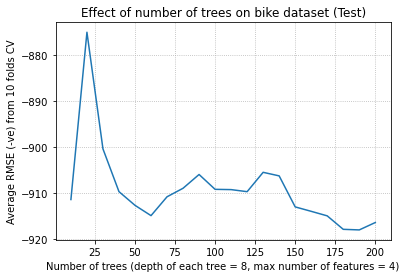

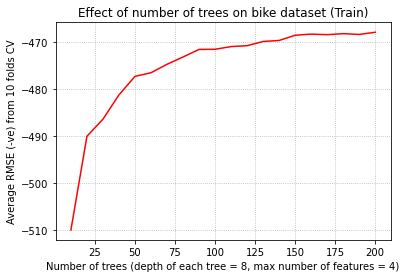

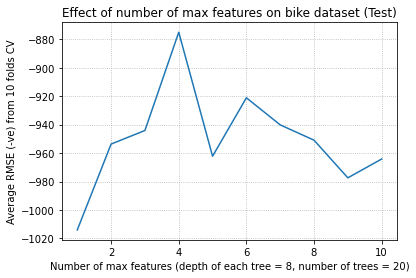

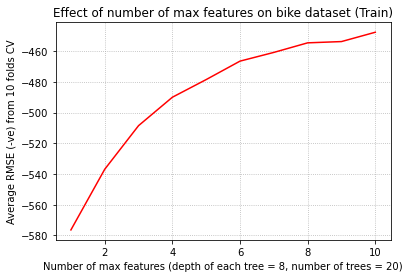

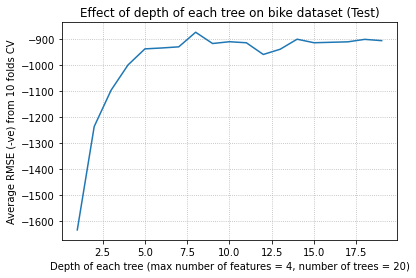

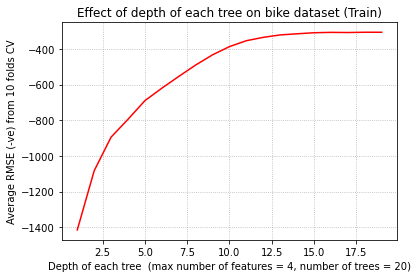

In [252]:
max_features = np.arange(1,11,1).reshape(10)
n_estimators = np.arange(10, 210, 10).reshape(20)
max_depth = np.arange(1, 20, 1).reshape(19)

bike_score = list((poly_result[(poly_result['param_model__max_depth'] == 8) & (poly_result['param_model__max_features'] == 4)]).mean_test_score)
bike_train = list((poly_result[(poly_result['param_model__max_depth'] == 8) & (poly_result['param_model__max_features'] == 4)]).mean_train_score)
plt.plot(n_estimators,bike_score)
plt.grid(linestyle=':')
plt.xlabel('Number of trees (depth of each tree = 8, max number of features = 4)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of number of trees on bike dataset (Test)')
plt.savefig('Q21a.png',dpi=300,bbox_inches='tight')
plt.show()
plt.plot(n_estimators,bike_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Number of trees (depth of each tree = 8, max number of features = 4)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of number of trees on bike dataset (Train)')
plt.savefig('Q21b.png',dpi=300,bbox_inches='tight')
plt.show()

bike_score = list((poly_result[(poly_result['param_model__max_depth'] == 8) & (poly_result['param_model__n_estimators'] == 20)]).mean_test_score)
bike_train = list((poly_result[(poly_result['param_model__max_depth'] == 8) & (poly_result['param_model__n_estimators'] == 20)]).mean_train_score)
plt.plot(max_features,bike_score)
plt.grid(linestyle=':')
plt.xlabel('Number of max features (depth of each tree = 8, number of trees = 20)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of number of max features on bike dataset (Test)')
plt.savefig('Q21c.png',dpi=300,bbox_inches='tight')
plt.show()
plt.plot(max_features,bike_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Number of max features (depth of each tree = 8, number of trees = 20)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of number of max features on bike dataset (Train)')
plt.savefig('Q21d.png',dpi=300,bbox_inches='tight')
plt.show()

bike_score = list((poly_result[(poly_result['param_model__max_features'] == 4) & (poly_result['param_model__n_estimators'] == 20)]).mean_test_score)
bike_train = list((poly_result[(poly_result['param_model__max_features'] == 4) & (poly_result['param_model__n_estimators'] == 20)]).mean_train_score)
plt.plot(max_depth,bike_score)
plt.grid(linestyle=':')
plt.xlabel('Depth of each tree (max number of features = 4, number of trees = 20)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of depth of each tree on bike dataset (Test)')
plt.savefig('Q21e.png',dpi=300,bbox_inches='tight')
plt.show()
plt.plot(max_depth,bike_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Depth of each tree  (max number of features = 4, number of trees = 20)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of depth of each tree on bike dataset (Train)')
plt.savefig('Q21f.png',dpi=300,bbox_inches='tight')
plt.show()

In [263]:
gridSuicide_RF = GridSearchCV(pipe_RF, param_grid=param_grid_RF, cv=10, n_jobs=-1, verbose=1, 
                                  scoring='neg_root_mean_squared_error', return_train_score=True).fit(XSuicideCur_F, YSuicide)

Fitting 10 folds for each of 3800 candidates, totalling 38000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 1186 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 1736 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 2386 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3136 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3986 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 4936 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 5986 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 7136 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 8386 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 9736 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 11186 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 12736 tasks    

In [264]:
poly_result = pd.DataFrame(gridSuicide_RF.cv_results_)[['mean_test_score','mean_train_score','param_model__max_features','param_model__n_estimators','param_model__max_depth']]
print('Best parameters (suicide):',gridSuicide_RF.best_params_,',Test RMSE:',gridSuicide_RF.best_score_)
print('Train RMSE:',max(poly_result.mean_train_score))

Best parameters (suicide): {'model__max_depth': 6, 'model__max_features': 3, 'model__n_estimators': 10} ,Test RMSE: -14.203124085489076
Train RMSE: -14.211886727921348


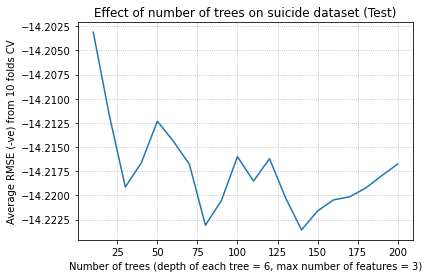

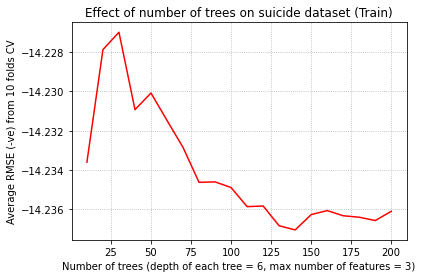

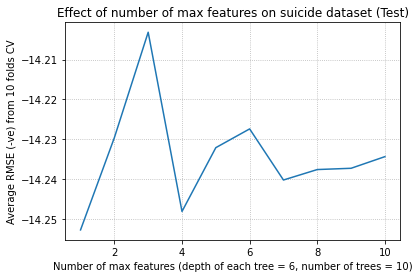

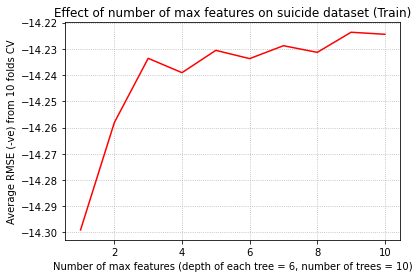

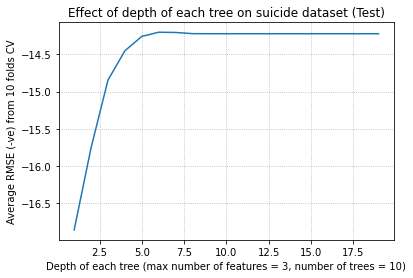

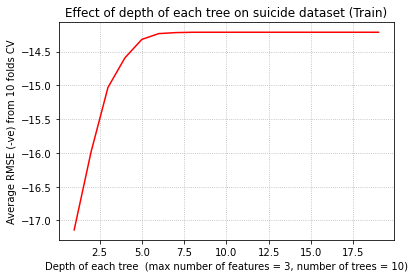

In [265]:
suicide_score = list((poly_result[(poly_result['param_model__max_depth'] == 6) & (poly_result['param_model__max_features'] == 3)]).mean_test_score)
suicide_train = list((poly_result[(poly_result['param_model__max_depth'] == 6) & (poly_result['param_model__max_features'] == 3)]).mean_train_score)
plt.plot(n_estimators,suicide_score)
plt.grid(linestyle=':')
plt.xlabel('Number of trees (depth of each tree = 6, max number of features = 3)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of number of trees on suicide dataset (Test)')
plt.savefig('Q21g.png',dpi=300,bbox_inches='tight')
plt.show()
plt.plot(n_estimators,suicide_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Number of trees (depth of each tree = 6, max number of features = 3)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of number of trees on suicide dataset (Train)')
plt.savefig('Q21h.png',dpi=300,bbox_inches='tight')
plt.show()

suicide_score = list((poly_result[(poly_result['param_model__max_depth'] == 6) & (poly_result['param_model__n_estimators'] == 10)]).mean_test_score)
suicide_train = list((poly_result[(poly_result['param_model__max_depth'] == 6) & (poly_result['param_model__n_estimators'] == 10)]).mean_train_score)
plt.plot(max_features,suicide_score)
plt.grid(linestyle=':')
plt.xlabel('Number of max features (depth of each tree = 6, number of trees = 10)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of number of max features on suicide dataset (Test)')
plt.savefig('Q21i.png',dpi=300,bbox_inches='tight')
plt.show()
plt.plot(max_features,suicide_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Number of max features (depth of each tree = 6, number of trees = 10)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of number of max features on suicide dataset (Train)')
plt.savefig('Q21j.png',dpi=300,bbox_inches='tight')
plt.show()

suicide_score = list((poly_result[(poly_result['param_model__max_features'] == 3) & (poly_result['param_model__n_estimators'] == 10)]).mean_test_score)
suicide_train = list((poly_result[(poly_result['param_model__max_features'] == 3) & (poly_result['param_model__n_estimators'] == 10)]).mean_train_score)
plt.plot(max_depth,suicide_score)
plt.grid(linestyle=':')
plt.xlabel('Depth of each tree (max number of features = 3, number of trees = 10)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of depth of each tree on suicide dataset (Test)')
plt.savefig('Q21k.png',dpi=300,bbox_inches='tight')
plt.show()
plt.plot(max_depth,suicide_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Depth of each tree  (max number of features = 3, number of trees = 10)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of depth of each tree on suicide dataset (Train)')
plt.savefig('Q21l.png',dpi=300,bbox_inches='tight')
plt.show()

In [267]:
param_grid_RF = {
    'model__max_features': np.arange(1,11,1),
    'model__n_estimators': np.arange(10, 50, 10),
    'model__max_depth': np.arange(1, 20, 1)
    
}
gridTranscode_RF = GridSearchCV(pipe_RF, param_grid=param_grid_RF, cv=10, n_jobs=-1, verbose=1, 
                                  scoring='neg_root_mean_squared_error', return_train_score=True).fit(XTranscodeCur_F, YTranscode)

Fitting 10 folds for each of 760 candidates, totalling 7600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 1186 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done 1736 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2386 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3136 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3986 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 4936 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 5986 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 7136 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 7600 out of 7600 | elapsed: 10.1min finished


In [268]:
poly_result = pd.DataFrame(gridTranscode_RF.cv_results_)[['mean_test_score','mean_train_score','param_model__max_features','param_model__n_estimators','param_model__max_depth']]
print('Best parameters (transcode):',gridTranscode_RF.best_params_,',Test RMSE:',gridTranscode_RF.best_score_)
print('Train RMSE:',max(poly_result.mean_train_score))

Best parameters (transcode): {'model__max_depth': 13, 'model__max_features': 4, 'model__n_estimators': 40} ,Test RMSE: -4.074124938241727
Train RMSE: -0.7462747479626495


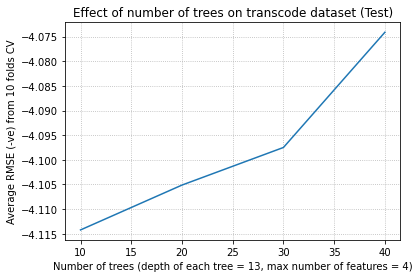

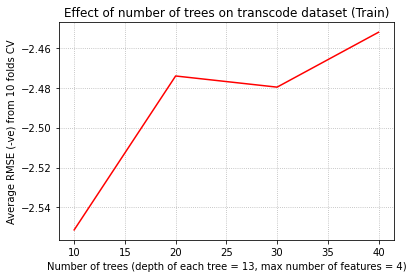

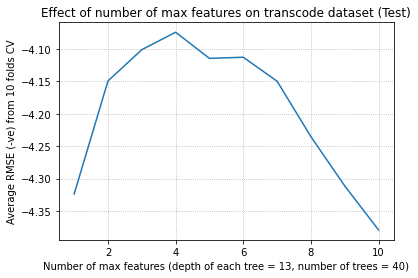

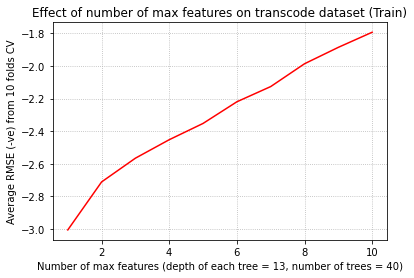

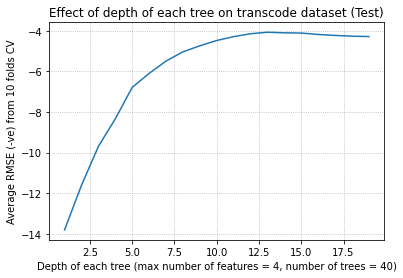

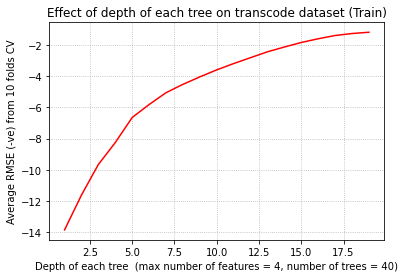

In [269]:
max_features = np.arange(1,11,1).reshape(10)
n_estimators = np.arange(10, 50, 10).reshape(4)
max_depth = np.arange(1, 20, 1).reshape(19)

transcode_score = list((poly_result[(poly_result['param_model__max_depth'] == 13) & (poly_result['param_model__max_features'] == 4)]).mean_test_score)
transcode_train = list((poly_result[(poly_result['param_model__max_depth'] == 13) & (poly_result['param_model__max_features'] == 4)]).mean_train_score)
plt.plot(n_estimators,transcode_score)
plt.grid(linestyle=':')
plt.xlabel('Number of trees (depth of each tree = 13, max number of features = 4)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of number of trees on transcode dataset (Test)')
plt.savefig('Q21m.png',dpi=300,bbox_inches='tight')
plt.show()
plt.plot(n_estimators,transcode_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Number of trees (depth of each tree = 13, max number of features = 4)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of number of trees on transcode dataset (Train)')
plt.savefig('Q21n.png',dpi=300,bbox_inches='tight')
plt.show()

transcode_score = list((poly_result[(poly_result['param_model__max_depth'] == 13) & (poly_result['param_model__n_estimators'] == 40)]).mean_test_score)
transcode_train = list((poly_result[(poly_result['param_model__max_depth'] == 13) & (poly_result['param_model__n_estimators'] == 40)]).mean_train_score)
plt.plot(max_features,transcode_score)
plt.grid(linestyle=':')
plt.xlabel('Number of max features (depth of each tree = 13, number of trees = 40)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of number of max features on transcode dataset (Test)')
plt.savefig('Q21o.png',dpi=300,bbox_inches='tight')
plt.show()
plt.plot(max_features,transcode_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Number of max features (depth of each tree = 13, number of trees = 40)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of number of max features on transcode dataset (Train)')
plt.savefig('Q21p.png',dpi=300,bbox_inches='tight')
plt.show()

transcode_score = list((poly_result[(poly_result['param_model__max_features'] == 4) & (poly_result['param_model__n_estimators'] == 40)]).mean_test_score)
transcode_train = list((poly_result[(poly_result['param_model__max_features'] == 4) & (poly_result['param_model__n_estimators'] == 40)]).mean_train_score)
plt.plot(max_depth,transcode_score)
plt.grid(linestyle=':')
plt.xlabel('Depth of each tree (max number of features = 4, number of trees = 40)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of depth of each tree on transcode dataset (Test)')
plt.savefig('Q21q.png',dpi=300,bbox_inches='tight')
plt.show()
plt.plot(max_depth,transcode_train,'r')
plt.grid(linestyle=':')
plt.xlabel('Depth of each tree  (max number of features = 4, number of trees = 40)')
plt.ylabel('Average RMSE (-ve) from 10 folds CV')
plt.title('Effect of depth of each tree on transcode dataset (Train)')
plt.savefig('Q21r.png',dpi=300,bbox_inches='tight')
plt.show()

### OOB Error for best models

In [270]:
print('OOB, Bike:',RandomForestRegressor(random_state=42,max_depth=8,
                                         max_features=4, n_estimators=20, oob_score=True).fit(XBikeCur_F,YBike).oob_score_)
print('OOB, Suicide:',RandomForestRegressor(random_state=42,max_depth=6, max_features=3, n_estimators=10, oob_score=True).fit(XSuicideCur_F,YSuicide).oob_score_)
print('OOB, Transcode:',RandomForestRegressor(random_state=42,max_depth=13, max_features=4, n_estimators=40, oob_score=True).fit(XTranscodeCur_F,YTranscode).oob_score_)

OOB, Bike: 0.8274957524625527
OOB, Suicide: 0.4220842787293496


/home/nesl/anaconda3/envs/tflite/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


OOB, Transcode: 0.9601340475580523


### Tree Visualization

In [272]:
vis_tree = RandomForestRegressor(random_state=42,max_depth=4, max_features=3, n_estimators=10).fit(XSuicideCur_F,YSuicide)

In [281]:
chY = SelectKBest(score_func=f_regression, k=10)
XTranscode_Test = chY.fit_transform(suicide_LR.loc[:, suicide_LR.columns != 'suicides/100k pop'], suicide_LR["suicides/100k pop"])
column_names = suicide_LR.loc[:, suicide_LR.columns != 'suicides/100k pop'].columns[chY.get_support()]

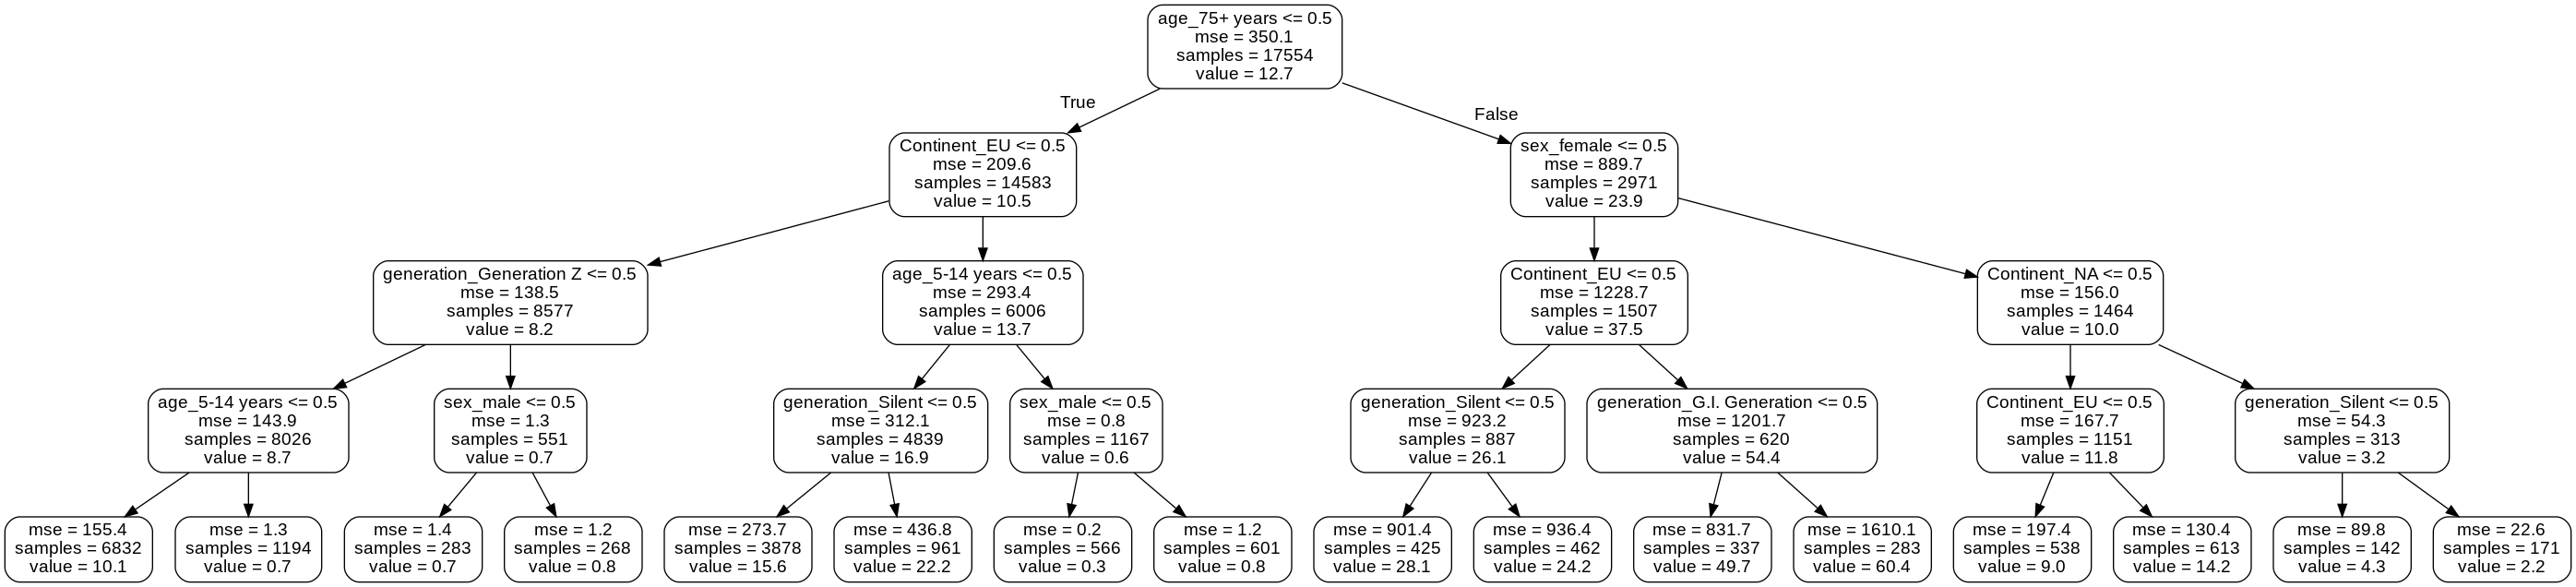

In [288]:
tree = vis_tree.estimators_[1]
export_graphviz(tree, out_file = 'tree.dot', feature_names = column_names, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [290]:
graph.write_png("Q23.png")

## Question 24 to 26

In [336]:
opt = BayesSearchCV(
    lgb.LGBMRegressor(random_state=42,verbose=1,n_jobs=-1),
    {
        'boosting_type': ['gbdt', 'dart','rf'],
        'num_leaves': np.arange(20,1000,10),
        'max_depth': np.arange(1,100,10),
        'n_estimators': np.arange(10,4000,100),
        'reg_alpha': [10.0**x for x in np.arange(-4,4)],
        'reg_lambda': [10.0**x for x in np.arange(-4,4)],
        'subsample': np.arange(0.1,1,0.1),
        'subsample_freq': np.arange(0,50,5),
        'min_split_gain': [10.0**x for x in np.arange(-4,0)]
    },
    n_iter=20,
    cv=10,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    scoring = 'neg_root_mean_squared_error',
    return_train_score = True
)

In [337]:
_ = opt.fit(XSuicideCur_F,YSuicide)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    5.4s remaining:   21.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:   36.7s remaining:  2.4min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   41.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:   10.0s remaining:   39.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:   12.8s remaining:   51.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   16.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:   10.8s remaining:   43.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    2.7s remaining:   10.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.8s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:   30.9s remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   36.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:   27.9s remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   36.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    7.1s remaining:   28.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.4s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:   48.5s remaining:  3.2min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   49.6s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    5.1s remaining:   20.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.4s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    6.4s remaining:   25.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.0s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:   23.8s remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   30.7s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    4.2s remaining:   16.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.2s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    9.8s remaining:   39.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.7s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    7.5s remaining:   30.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.0s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    2.3s remaining:    9.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.4s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:   17.8s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   26.9s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    1.5s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.6s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:   11.5s remaining:   46.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   16.9s finished


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20
[LightGBM] [Info] Number of data points in the train set: 27820, number of used features: 10
[LightGBM] [Info] Start training from score 12.816097
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [348]:
print('Best parameters (suicide):',opt.best_params_,',Test RMSE:',opt.best_score_)
print('Train RMSE:',min(opt.cv_results_['mean_train_score']))

Best parameters (suicide): OrderedDict([('boosting_type', 'gbdt'), ('max_depth', 81), ('min_split_gain', 0.0001), ('n_estimators', 710), ('num_leaves', 800), ('reg_alpha', 0.1), ('reg_lambda', 0.1), ('subsample', 0.5), ('subsample_freq', 35)]) ,Test RMSE: -14.208668140311447
Train RMSE: -14.277083632830061


In [365]:
optcatLG = BayesSearchCV(
    CatBoostRegressor(random_state=42,verbose=1,thread_count=-1,bootstrap_type='Bayesian'), 
    {
        'colsample_bylevel': np.arange(0.1,1,0.1),
        'num_trees': np.arange(10,4000,100),
        'l2_leaf_reg': [10.0**x for x in np.arange(-4,4)],
        'num_leaves': np.arange(20,1000,10),
        'max_depth': np.arange(1,16,2),
        'bagging_temperature': np.arange(0.1,10,1),
        'grow_policy': ['Lossguide'],
        
    },
    n_iter=20,
    cv=10,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    scoring = 'neg_root_mean_squared_error',
    return_train_score = True
)

In [366]:
_ = optcatLG.fit(XSuicideCur_F,YSuicide)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:  3.7min remaining: 14.7min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:  1.0min remaining:  4.1min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:   21.1s remaining:  1.4min


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   24.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:  2.3min remaining:  9.1min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:  4.2min remaining: 16.9min


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:  5.2min remaining: 20.8min


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:  4.9min remaining: 19.7min


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:  2.3min remaining:  9.1min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    1.7s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.1s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:  2.5min remaining: 10.0min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.6min finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:  1.3min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.3min finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:  4.3min remaining: 17.2min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.5min finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:  1.7min remaining:  6.9min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.9min finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:  5.5min remaining: 21.9min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.8min finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:  1.4min remaining:  5.7min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.5min finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:  1.3min remaining:  5.4min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.5min finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:  3.2min remaining: 12.9min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.4min finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:   40.0s remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   42.4s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    0.8s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:   11.4s remaining:   45.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.7s finished


0:	learn: 18.7500092	total: 80.7ms	remaining: 16.9s
1:	learn: 18.5363022	total: 109ms	remaining: 11.3s
2:	learn: 18.3454296	total: 131ms	remaining: 9.03s
3:	learn: 18.1596398	total: 148ms	remaining: 7.63s
4:	learn: 17.9805087	total: 168ms	remaining: 6.88s
5:	learn: 17.8066175	total: 189ms	remaining: 6.43s
6:	learn: 17.6381880	total: 208ms	remaining: 6.03s
7:	learn: 17.4742820	total: 224ms	remaining: 5.66s
8:	learn: 17.3306908	total: 241ms	remaining: 5.38s
9:	learn: 17.1861840	total: 260ms	remaining: 5.2s
10:	learn: 17.0498120	total: 272ms	remaining: 4.92s
11:	learn: 16.9165353	total: 287ms	remaining: 4.73s
12:	learn: 16.7924394	total: 297ms	remaining: 4.51s
13:	learn: 16.6769927	total: 305ms	remaining: 4.27s
14:	learn: 16.5609446	total: 313ms	remaining: 4.06s
15:	learn: 16.4524829	total: 320ms	remaining: 3.87s
16:	learn: 16.3477251	total: 327ms	remaining: 3.71s
17:	learn: 16.2446847	total: 333ms	remaining: 3.55s
18:	learn: 16.1490823	total: 340ms	remaining: 3.42s
19:	learn: 16.0585175	

168:	learn: 14.2388293	total: 1.7s	remaining: 412ms
169:	learn: 14.2387195	total: 1.71s	remaining: 402ms
170:	learn: 14.2386099	total: 1.72s	remaining: 393ms
171:	learn: 14.2384334	total: 1.74s	remaining: 385ms
172:	learn: 14.2383986	total: 1.75s	remaining: 374ms
173:	learn: 14.2382953	total: 1.76s	remaining: 364ms
174:	learn: 14.2381849	total: 1.77s	remaining: 354ms
175:	learn: 14.2380440	total: 1.77s	remaining: 343ms
176:	learn: 14.2379349	total: 1.78s	remaining: 332ms
177:	learn: 14.2378349	total: 1.79s	remaining: 322ms
178:	learn: 14.2377186	total: 1.8s	remaining: 311ms
179:	learn: 14.2376157	total: 1.8s	remaining: 300ms
180:	learn: 14.2375169	total: 1.81s	remaining: 290ms
181:	learn: 14.2374048	total: 1.82s	remaining: 280ms
182:	learn: 14.2373807	total: 1.82s	remaining: 269ms
183:	learn: 14.2372946	total: 1.83s	remaining: 258ms
184:	learn: 14.2371619	total: 1.84s	remaining: 248ms
185:	learn: 14.2371105	total: 1.85s	remaining: 238ms
186:	learn: 14.2370025	total: 1.85s	remaining: 22

In [367]:
print('Best parameters (suicide):',optcatLG.best_params_,',Test RMSE:',optcatLG.best_score_)
print('Train RMSE:',min(optcatLG.cv_results_['mean_train_score']))

Best parameters (suicide): OrderedDict([('bagging_temperature', 2.1), ('colsample_bylevel', 0.8), ('grow_policy', 'Lossguide'), ('l2_leaf_reg', 100.0), ('max_depth', 5), ('num_leaves', 280), ('num_trees', 210)]) ,Test RMSE: -14.221058625294384
Train RMSE: -17.120537619115954


In [371]:
optcat = BayesSearchCV(
    CatBoostRegressor(random_state=42,verbose=1,thread_count=-1,bootstrap_type='Bayesian',used_ram_limit='5gb'), 
    {
        'colsample_bylevel': np.arange(0.1,1,0.1),
        'num_trees': np.arange(10,1000,100),
        'l2_leaf_reg': [10.0**x for x in np.arange(-4,4)],
        'max_depth': np.arange(1,16,2),
        'bagging_temperature': np.arange(0.1,10,1),
        'grow_policy': ['SymmetricTree','Depthwise'],
        'score_function': ['Cosine','L2']
        
    },
    n_iter=10,
    cv=10,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    scoring = 'neg_root_mean_squared_error',
    return_train_score = True
)

In [372]:
_ = optcat.fit(XSuicideCur_F,YSuicide)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:   19.0s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   19.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:   13.2s remaining:   52.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   17.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:   11.5s remaining:   46.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    1.1s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:   19.2s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   20.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:   39.0s remaining:  2.6min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   44.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:   51.3s remaining:  3.4min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   56.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    0.4s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    4.4s remaining:   17.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.2s finished


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:    4.0s remaining:   15.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.0s finished


0:	learn: 18.7191733	total: 27.4ms	remaining: 5.74s
1:	learn: 18.4847287	total: 46.3ms	remaining: 4.82s
2:	learn: 18.2691763	total: 59.8ms	remaining: 4.12s
3:	learn: 18.0598299	total: 70.7ms	remaining: 3.64s
4:	learn: 17.8606153	total: 80.9ms	remaining: 3.32s
5:	learn: 17.6673255	total: 93.3ms	remaining: 3.17s
6:	learn: 17.4964795	total: 104ms	remaining: 3.01s
7:	learn: 17.3252520	total: 115ms	remaining: 2.91s
8:	learn: 17.1618552	total: 127ms	remaining: 2.84s
9:	learn: 17.0137132	total: 138ms	remaining: 2.76s
10:	learn: 16.8731387	total: 149ms	remaining: 2.69s
11:	learn: 16.7290527	total: 161ms	remaining: 2.66s
12:	learn: 16.5923386	total: 175ms	remaining: 2.64s
13:	learn: 16.4626685	total: 187ms	remaining: 2.61s
14:	learn: 16.3457840	total: 197ms	remaining: 2.56s
15:	learn: 16.2343312	total: 204ms	remaining: 2.48s
16:	learn: 16.1287620	total: 211ms	remaining: 2.4s
17:	learn: 16.0331878	total: 217ms	remaining: 2.32s
18:	learn: 15.9414167	total: 226ms	remaining: 2.27s
19:	learn: 15.848

179:	learn: 14.2343382	total: 1.03s	remaining: 172ms
180:	learn: 14.2343268	total: 1.04s	remaining: 166ms
181:	learn: 14.2343186	total: 1.04s	remaining: 160ms
182:	learn: 14.2342674	total: 1.05s	remaining: 155ms
183:	learn: 14.2342410	total: 1.06s	remaining: 150ms
184:	learn: 14.2342046	total: 1.06s	remaining: 144ms
185:	learn: 14.2341857	total: 1.07s	remaining: 138ms
186:	learn: 14.2341097	total: 1.07s	remaining: 132ms
187:	learn: 14.2340749	total: 1.08s	remaining: 126ms
188:	learn: 14.2340485	total: 1.08s	remaining: 120ms
189:	learn: 14.2340289	total: 1.08s	remaining: 114ms
190:	learn: 14.2340142	total: 1.08s	remaining: 108ms
191:	learn: 14.2339531	total: 1.09s	remaining: 102ms
192:	learn: 14.2339447	total: 1.09s	remaining: 96ms
193:	learn: 14.2338954	total: 1.09s	remaining: 90.2ms
194:	learn: 14.2338787	total: 1.1s	remaining: 84.3ms
195:	learn: 14.2338675	total: 1.1s	remaining: 78.5ms
196:	learn: 14.2338426	total: 1.1s	remaining: 72.7ms
197:	learn: 14.2338232	total: 1.1s	remaining: 

In [373]:
print('Best parameters (suicide):',optcat.best_params_,',Test RMSE:',optcat.best_score_)
print('Train RMSE:',min(optcat.cv_results_['mean_train_score']))

Best parameters (suicide): OrderedDict([('bagging_temperature', 0.1), ('colsample_bylevel', 0.8), ('grow_policy', 'SymmetricTree'), ('l2_leaf_reg', 0.01), ('max_depth', 9), ('num_trees', 210), ('score_function', 'Cosine')]) ,Test RMSE: -14.220428456433268
Train RMSE: -17.23940884883195


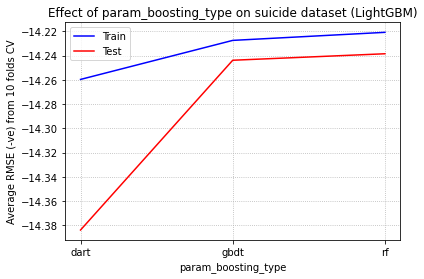

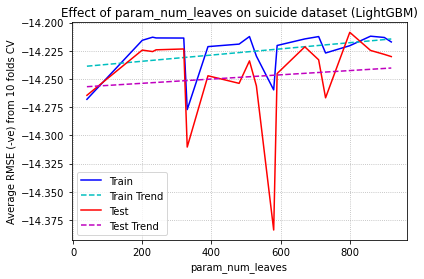

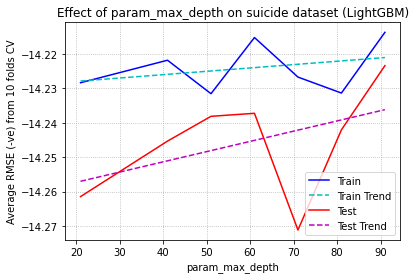

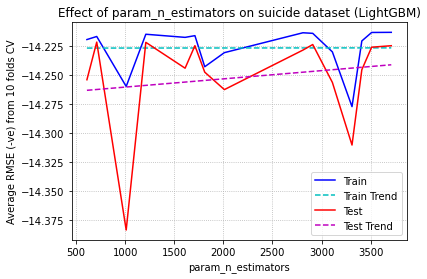

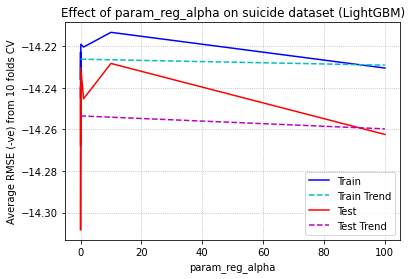

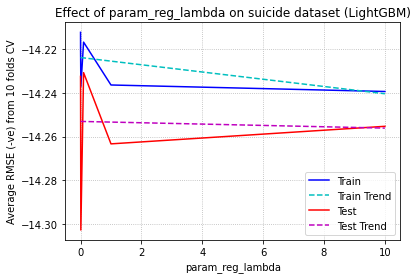

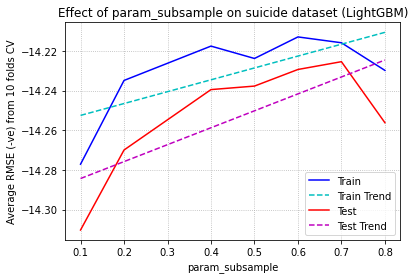

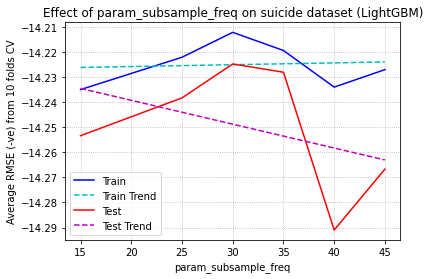

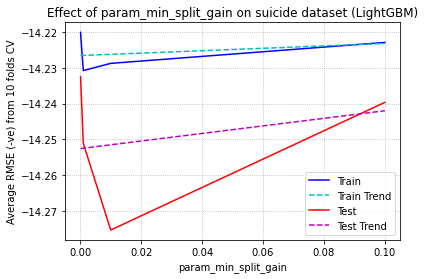

In [490]:
param_list = ['param_boosting_type','param_num_leaves','param_max_depth','param_n_estimators',
             'param_reg_alpha','param_reg_lambda','param_subsample','param_subsample_freq',
              'param_min_split_gain'] 
for param in param_list:
    param_set = sorted(list(set(opt.cv_results_[param])))
    param_trainscore = []
    param_testscore = []
    for item in param_set:
        param_trainscore.append(np.mean([opt.cv_results_['mean_train_score'][k] 
                                    for k in [i for i, x in enumerate(opt.cv_results_[param]) 
                                              if x == item]])) 
        param_testscore.append(np.mean([opt.cv_results_['mean_test_score'][k] 
                                    for k in [i for i, x in enumerate(opt.cv_results_[param]) 
                                              if x == item]])) 
    plt.plot(param_set,param_trainscore,label="Train",color='b')
    if(type(param_set[0]).__name__ != 'str'):
        plt.plot(param_set,np.poly1d(np.polyfit(param_set,param_trainscore,1))(param_set),'--',label="Train Trend",color='c')
    plt.plot(param_set,param_testscore,label="Test",color='r')
    if(type(param_set[0]).__name__ != 'str'):
        plt.plot(param_set,np.poly1d(np.polyfit(param_set,param_testscore,1))(param_set),'--',label="Test Trend",color='m')
    plt.legend()
    plt.grid(linestyle=':')
    plt.xlabel(param)
    plt.ylabel('Average RMSE (-ve) from 10 folds CV')
    plt.title("Effect of %s on suicide dataset (LightGBM)" % param)
    plt.savefig('Q26lightgbm'+param+'.png',dpi=300,bbox_inches='tight')
    plt.show()

In [607]:
def join_list(param_set_1,param_set_2,param_score_1,param_score_2):
    names = param_set_1 + param_set_2
    results_values = param_score_1 + param_score_2
    averages = {}
    counts = {}
    for name, value in zip(names, results_values):
        if name in averages:
            averages[name] += value
            counts[name] += 1
        else:
            averages[name] = value
            counts[name] = 1
    for name in averages:
        averages[name] = averages[name]/float(counts[name])
    comb_param_set = list(averages.keys())
    comb_score = list(averages.values())
    return comb_param_set, comb_score

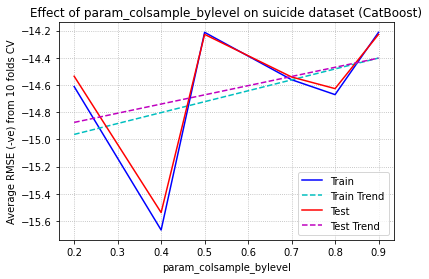

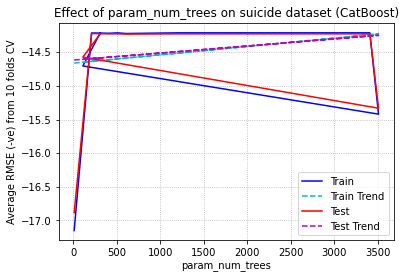

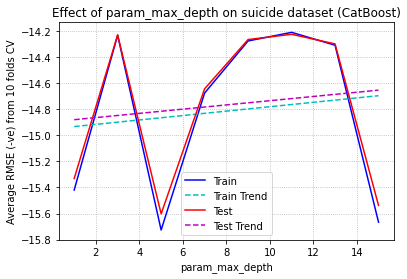

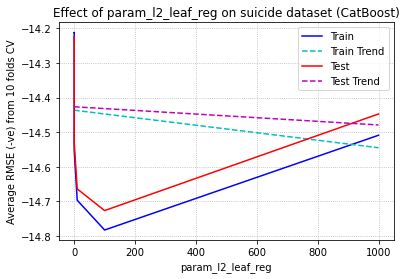

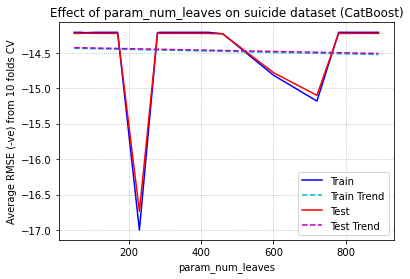

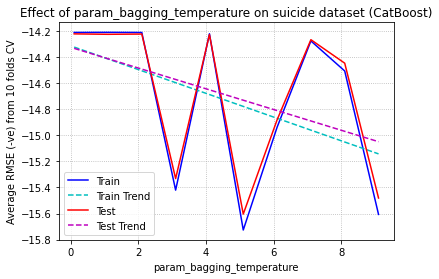

In [609]:
param_list = ['param_colsample_bylevel','param_num_trees','param_max_depth','param_l2_leaf_reg',
              'param_num_leaves','param_bagging_temperature'] 
for param in param_list:
    param_set = sorted(list(set(optcatLG.cv_results_[param])))
    param_set_2 = sorted(list(set(optcat.cv_results_[param])))
    param_trainscore = []
    param_trainscore_2 = []
    param_testscore = []
    param_testscore_2 = []
    for item in param_set:
        param_trainscore.append(np.mean([optcatLG.cv_results_['mean_train_score'][k] 
                                    for k in [i for i, x in enumerate(optcatLG.cv_results_[param]) 
                                              if x == item]])) 
        param_testscore.append(np.mean([optcatLG.cv_results_['mean_test_score'][k] 
                                    for k in [i for i, x in enumerate(optcatLG.cv_results_[param]) 
                                              if x == item]])) 
    for it in param_set_2:
        param_trainscore_2.append(np.mean([optcat.cv_results_['mean_train_score'][k] 
                                    for k in [i for i, x in enumerate(optcat.cv_results_[param]) 
                                              if x == it]])) 
        param_testscore_2.append(np.mean([optcat.cv_results_['mean_test_score'][k] 
                                    for k in [i for i, x in enumerate(optcat.cv_results_[param]) 
                                              if x == it]])) 
        
    comb_param_set, comb_trainscore = join_list(param_set,param_set_2,param_trainscore,param_trainscore_2)
    comb_param_set, comb_testscore = join_list(param_set,param_set_2,param_testscore,param_testscore_2)
    
    plt.plot(comb_param_set,comb_trainscore,label="Train",color='b')
    if(type(comb_param_set[0]).__name__ != 'str'):
        plt.plot(comb_param_set,np.poly1d(np.polyfit(comb_param_set,comb_trainscore,1))(comb_param_set),'--',label="Train Trend",color='c')
    plt.plot(comb_param_set,comb_testscore,label="Test",color='r')
    if(type(comb_param_set[0]).__name__ != 'str'):
        plt.plot(comb_param_set,np.poly1d(np.polyfit(comb_param_set,comb_testscore,1))(comb_param_set),'--',label="Test Trend",color='m')
    plt.legend()
    plt.grid(linestyle=':')
    plt.xlabel(param)
    plt.ylabel('Average RMSE (-ve) from 10 folds CV')
    plt.title("Effect of %s on suicide dataset (CatBoost)" % param)
    plt.savefig('Q26catboost'+param+'.png',dpi=300,bbox_inches='tight')
    plt.show()

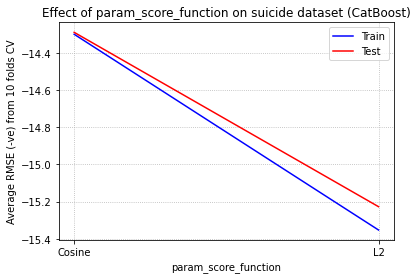

In [611]:
param_list = ['param_score_function'] 
for param in param_list:
    param_set = sorted(list(set(optcat.cv_results_[param])))
    param_trainscore = []
    param_testscore = []
    for item in param_set:
        param_trainscore.append(np.mean([optcat.cv_results_['mean_train_score'][k] 
                                    for k in [i for i, x in enumerate(optcat.cv_results_[param]) 
                                              if x == item]])) 
        param_testscore.append(np.mean([optcat.cv_results_['mean_test_score'][k] 
                                    for k in [i for i, x in enumerate(optcat.cv_results_[param]) 
                                              if x == item]])) 
    plt.plot(param_set,param_trainscore,label="Train",color='b')
    if(type(param_set[0]).__name__ != 'str'):
        plt.plot(param_set,np.poly1d(np.polyfit(param_set,param_trainscore,1))(param_set),'--',label="Train Trend",color='c')
    plt.plot(param_set,param_testscore,label="Test",color='r')
    if(type(param_set[0]).__name__ != 'str'):
        plt.plot(param_set,np.poly1d(np.polyfit(param_set,param_testscore,1))(param_set),'--',label="Test Trend",color='m')
    plt.legend()
    plt.grid(linestyle=':')
    plt.xlabel(param)
    plt.ylabel('Average RMSE (-ve) from 10 folds CV')
    plt.title("Effect of %s on suicide dataset (CatBoost)" % param)
    plt.savefig('Q26catboost'+param+'.png',dpi=300,bbox_inches='tight')
    plt.show()

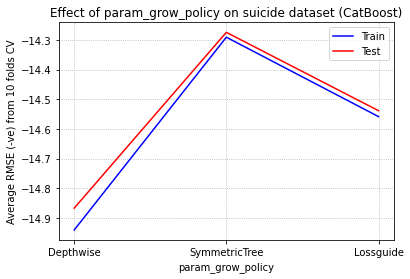

In [619]:
param_list = ['param_grow_policy'] 
for param in param_list:
    param_set = sorted(list(set(optcat.cv_results_[param])))
    param_trainscore = []
    param_testscore = []
    for item in param_set:
        param_trainscore.append(np.mean([optcat.cv_results_['mean_train_score'][k] 
                                    for k in [i for i, x in enumerate(optcat.cv_results_[param]) 
                                              if x == item]])) 
        param_testscore.append(np.mean([optcat.cv_results_['mean_test_score'][k] 
                                    for k in [i for i, x in enumerate(optcat.cv_results_[param]) 
                                              if x == item]])) 
    param_trainscore.append(np.mean(optcatLG.cv_results_['mean_train_score']))
    param_testscore.append(np.mean(optcatLG.cv_results_['mean_test_score']))
    param_set.append('Lossguide')
    plt.plot(param_set,param_trainscore,label="Train",color='b')
    if(type(param_set[0]).__name__ != 'str'):
        plt.plot(param_set,np.poly1d(np.polyfit(param_set,param_trainscore,1))(param_set),'--',label="Train Trend",color='c')
    plt.plot(param_set,param_testscore,label="Test",color='r')
    if(type(param_set[0]).__name__ != 'str'):
        plt.plot(param_set,np.poly1d(np.polyfit(param_set,param_testscore,1))(param_set),'--',label="Test Trend",color='m')
    plt.legend()
    plt.grid(linestyle=':')
    plt.xlabel(param)
    plt.ylabel('Average RMSE (-ve) from 10 folds CV')
    plt.title("Effect of %s on suicide dataset (CatBoost)" % param)
    plt.savefig('Q26catboost'+param+'.png',dpi=300,bbox_inches='tight')
    plt.show()